### This notebook is for preforming EDA on the CoD dataset

Lets first build out the data from out batched Perspective queries

In [1]:
import pickle
import json
import pandas as pd
import matplotlib.pyplot as plt 
from keras.preprocessing.text import Tokenizer
import seaborn as sns
import spacy
import os
import pandas as pd
import numpy as np
import spacy
import unidecode
import contractions as contract
import re
import wordninja
import collections
import pkg_resources
from wordcloud import WordCloud
from textblob import TextBlob
import nltk
from nltk.probability import FreqDist

In [2]:
%%script false --no-raise-error
data = []
up_to_batch = 14
for item in range(9000,int((up_to_batch + 1) * 9000),9000):
    filepath="./cod_toxic_scores/all_data_posTox_quota_increase/batch_" + str(int(item/9000)) + "_remainder_" + str(int(item%9000)) + ".pkl"
    with open(filepath, 'rb') as f:
        tmp_load = pickle.load(f)
    for item in tmp_load:
        data.append(item)

Couldn't find program: 'false'


In [3]:
%%script false --no-raise-error
# From JF's data_cleaning.ipynb
# Remove some important words from stopwords list 
# python -m spacy download en_core_web_sm
deselecTox_stop_words = ['no', 'not']
nlp = spacy.load("en_core_web_sm") 
for w in deselecTox_stop_words:
    nlp.vocab[w].is_stop = False

Couldn't find program: 'false'


In [4]:
%%script false --no-raise-error
# From JF's data_cleaning.ipynb
def text_preprocessing(text,stop_words=True,convert_num=True,lemmatization=True):
    doc = nlp(text) # tokenise text
    clean_text = []
    # return text
    for token in doc:
        flag = True
        edit = token.text
        # remove stop words
        if stop_words == True and token.is_stop and token.pos_ != 'NUM': 
            flag = False
        # exclude number words
        if converTox_num == True and token.pos_ == 'NUM' and flag == True:
            flag = False
        # convert tokens to base form
        elif lemmatization == True and token.lemma_ != "-PRON-" and flag == True:
            edit = token.lemma_
        # append tokens edited and not removed to list 
        if edit != "" and flag == True:
            clean_text.append(edit)        
    return " ".join(clean_text)

Couldn't find program: 'false'


In [5]:
%%script false --no-raise-error
df = pd.DataFrame(data)
cols = ['Time','User_Id','Text','Attachment','Reply_chain','Reactions','gif','Edited_Time','TOXICITY_Probability']
df.set_axis(cols, axis=1,inplace=True)
df.head()

Couldn't find program: 'false'


In [6]:
%%script false --no-raise-error
df["Text"] = df["Text"].apply(text_preprocessing)
df.head()

Couldn't find program: 'false'


In [7]:
%%script false --no-raise-error
df["Text"] = df["Text"].str.replace(r'\b\w{1,1}\b', '', regex=True)
df["Text"] = df["Text"].str.replace('  ', ' ', regex=True)
df["Text"] = df["Text"].str.strip()
df.head()

Couldn't find program: 'false'


### Lets build some buckets of TOXIC_Probability scores

In [8]:
# pkl
#df.to_pickle("./clean_stopwords_removed_toxic_rated_cod_text.pkl") 
df = pd.read_pickle("./clean_stopwords_removed_toxic_rated_cod_text.pkl")
df.head() 

Time  User_Id               Text Attachment          Reply_chain  \
0  1661962692851     1108              supra        NaN                  NaN   
1  1661962696380      622                 hb        NaN                  NaN   
2  1661962696556      113       ana de armas        NaN  1014569529956909139   
3  1661962700953        3          nice like        NaN  1014569710844653588   
4  1661962713995        8  friday work today        NaN  1014569740078956666   

              Reactions  gif  Edited_Time  TOXICITY_Probability  
0  [{'c': 1, 'n': '🤓'}]  NaN          NaN              0.043375  
1                   NaN  NaN          NaN              0.029984  
2                   NaN  NaN          NaN              0.108281  
3                   NaN  NaN          NaN              0.075312  
4                   NaN  NaN          NaN              0.017007

## We now have our TOXIC classification dataset.  Time for EDA

https://www.analyticsvidhya.com/blog/2020/04/beginners-guide-exploratory-data-analysis-text-data/

https://towardsdatascience.com/nlp-part-3-exploratory-data-analysis-of-text-data-1caa8ab3f79d

https://neptune.ai/blog/exploratory-data-analysis-natural-language-processing-tools

In [9]:
Tox_0_1_df = df[df['TOXICITY_Probability'].between(0, 0.1, inclusive='left')]
print(len(Tox_0_1_df))
Tox_1_2_df = df[df['TOXICITY_Probability'].between(0.1, 0.2, inclusive='left')]
print(len(Tox_1_2_df))
Tox_2_3_df = df[df['TOXICITY_Probability'].between(0.2, 0.3, inclusive='left')]
print(len(Tox_2_3_df))
Tox_3_4_df = df[df['TOXICITY_Probability'].between(0.3, 0.4, inclusive='left')]
print(len(Tox_3_4_df))
Tox_4_5_df = df[df['TOXICITY_Probability'].between(0.4, 0.5, inclusive='left')]
print(len(Tox_4_5_df))
Tox_5_6_df = df[df['TOXICITY_Probability'].between(0.5, 0.6, inclusive='left')]
print(len(Tox_5_6_df))
Tox_6_7_df = df[df['TOXICITY_Probability'].between(0.6, 0.7, inclusive='left')]
print(len(Tox_6_7_df))
Tox_7_8_df = df[df['TOXICITY_Probability'].between(0.7, 0.8, inclusive='left')]
print(len(Tox_7_8_df))
Tox_8_9_df = df[df['TOXICITY_Probability'].between(0.8, 0.9, inclusive='left')]
print(len(Tox_8_9_df))
Tox_9_10_df = df[df['TOXICITY_Probability'].between(0.9, 1, inclusive='both')]
print(len(Tox_9_10_df))

72373
21114
9249
5585
3057
2519
1179
1823
3020
1554


In [10]:
# From JF's data_cleaning.ipynb
# Tokenize all histogram classes
tokenizer_Tox_0_1_df = Tokenizer()
tokenizer_Tox_0_1_df.fit_on_texts(Tox_0_1_df['Text'])

tokenizer_Tox_1_2_df = Tokenizer()
tokenizer_Tox_1_2_df.fit_on_texts(Tox_1_2_df['Text'])

tokenizer_Tox_2_3_df = Tokenizer()
tokenizer_Tox_2_3_df.fit_on_texts(Tox_2_3_df['Text'])

tokenizer_Tox_3_4_df = Tokenizer()
tokenizer_Tox_3_4_df.fit_on_texts(Tox_3_4_df['Text'])

tokenizer_Tox_4_5_df = Tokenizer()
tokenizer_Tox_4_5_df.fit_on_texts(Tox_4_5_df['Text'])

tokenizer_Tox_5_6_df = Tokenizer()
tokenizer_Tox_5_6_df.fit_on_texts(Tox_5_6_df['Text'])

tokenizer_Tox_6_7_df = Tokenizer()
tokenizer_Tox_6_7_df.fit_on_texts(Tox_6_7_df['Text'])

tokenizer_Tox_7_8_df = Tokenizer()
tokenizer_Tox_7_8_df.fit_on_texts(Tox_7_8_df['Text'])

tokenizer_Tox_8_9_df = Tokenizer()
tokenizer_Tox_8_9_df.fit_on_texts(Tox_8_9_df['Text'])

tokenizer_Tox_9_10_df = Tokenizer()
tokenizer_Tox_9_10_df.fit_on_texts(Tox_9_10_df['Text'])

In [11]:
# Obtain word frequency 
word_freq_tokenizer_Tox_0_1_df = pd.DataFrame(tokenizer_Tox_0_1_df.word_counts.items(), columns=['word','count']).sort_values(by='count', ascending=False)
word_freq_tokenizer_Tox_1_2_df = pd.DataFrame(tokenizer_Tox_1_2_df.word_counts.items(), columns=['word','count']).sort_values(by='count', ascending=False)
word_freq_tokenizer_Tox_2_3_df = pd.DataFrame(tokenizer_Tox_2_3_df.word_counts.items(), columns=['word','count']).sort_values(by='count', ascending=False)
word_freq_tokenizer_Tox_3_4_df = pd.DataFrame(tokenizer_Tox_3_4_df.word_counts.items(), columns=['word','count']).sort_values(by='count', ascending=False)
word_freq_tokenizer_Tox_4_5_df = pd.DataFrame(tokenizer_Tox_4_5_df.word_counts.items(), columns=['word','count']).sort_values(by='count', ascending=False)
word_freq_tokenizer_Tox_5_6_df = pd.DataFrame(tokenizer_Tox_5_6_df.word_counts.items(), columns=['word','count']).sort_values(by='count', ascending=False)
word_freq_tokenizer_Tox_6_7_df = pd.DataFrame(tokenizer_Tox_6_7_df.word_counts.items(), columns=['word','count']).sort_values(by='count', ascending=False)
word_freq_tokenizer_Tox_7_8_df = pd.DataFrame(tokenizer_Tox_7_8_df.word_counts.items(), columns=['word','count']).sort_values(by='count', ascending=False)
word_freq_tokenizer_Tox_8_9_df = pd.DataFrame(tokenizer_Tox_8_9_df.word_counts.items(), columns=['word','count']).sort_values(by='count', ascending=False)
word_freq_tokenizer_Tox_9_10_df = pd.DataFrame(tokenizer_Tox_9_10_df.word_counts.items(), columns=['word','count']).sort_values(by='count', ascending=False)

## Frequent Words and Message Length

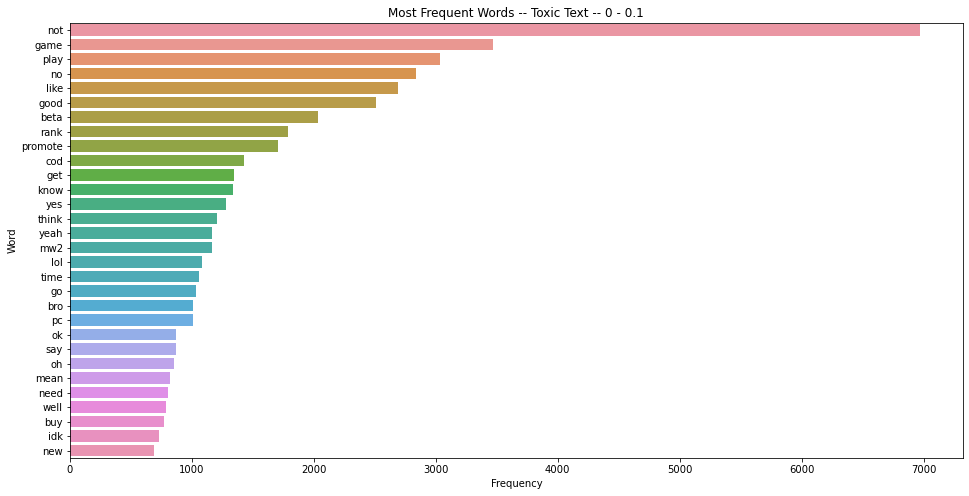

Word counts


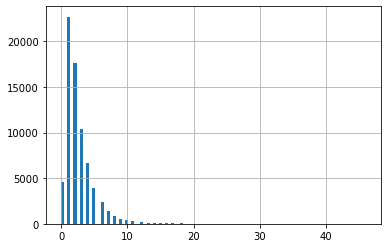

count    72373.000000
mean         2.609274
std          2.398066
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         46.000000
dtype: float64


In [12]:
# From JF's data_cleaning.ipynb
# Plot bar graph for word frequency 
plt.figure(figsize=(16, 8))
sns.barplot(x='count',y='word',data=word_freq_tokenizer_Tox_0_1_df.iloc[:30])
plt.title('Most Frequent Words -- Toxic Text -- 0 - 0.1')
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.show()
# From JF's data_cleaning.ipynb
# Get word count of posts 
print("Word counts")
posts_len = [len(x.split()) for x in Tox_0_1_df['Text']]
pd.Series(posts_len).hist(bins=100)
plt.show()
print(pd.Series(posts_len).describe())

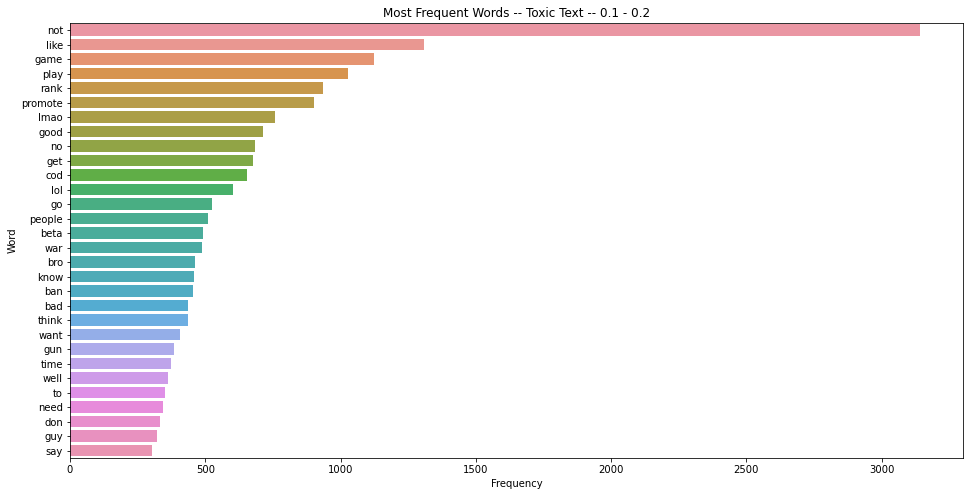

Word counts


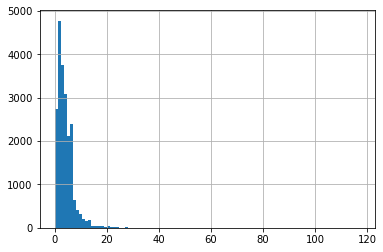

count    21114.000000
mean         4.135124
std          3.590337
min          0.000000
25%          2.000000
50%          3.000000
75%          5.000000
max        117.000000
dtype: float64


In [13]:
# From JF's data_cleaning.ipynb
# Plot bar graph for word frequency 
plt.figure(figsize=(16, 8))
sns.barplot(x='count',y='word',data=word_freq_tokenizer_Tox_1_2_df.iloc[:30])
plt.title('Most Frequent Words -- Toxic Text -- 0.1 - 0.2')
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.show()
# From JF's data_cleaning.ipynb
# Get word count of posts 
print("Word counts")
posts_len = [len(x.split()) for x in Tox_1_2_df['Text']]
pd.Series(posts_len).hist(bins=100)
plt.show()
print(pd.Series(posts_len).describe())

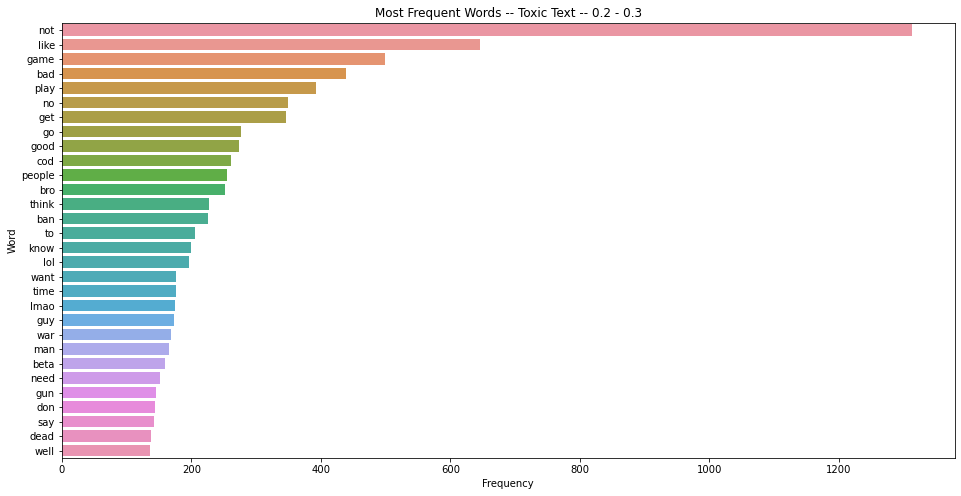

Word counts


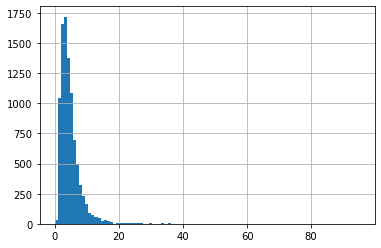

count    9249.000000
mean        4.481566
std         3.981699
min         0.000000
25%         2.000000
50%         4.000000
75%         6.000000
max        95.000000
dtype: float64


In [14]:
# From JF's data_cleaning.ipynb
# Plot bar graph for word frequency 
plt.figure(figsize=(16, 8))
sns.barplot(x='count',y='word',data=word_freq_tokenizer_Tox_2_3_df.iloc[:30])
plt.title('Most Frequent Words -- Toxic Text -- 0.2 - 0.3')
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.show()
# From JF's data_cleaning.ipynb
# Get word count of posts 
print("Word counts")
posts_len = [len(x.split()) for x in Tox_2_3_df['Text']]
pd.Series(posts_len).hist(bins=100)
plt.show()
print(pd.Series(posts_len).describe())

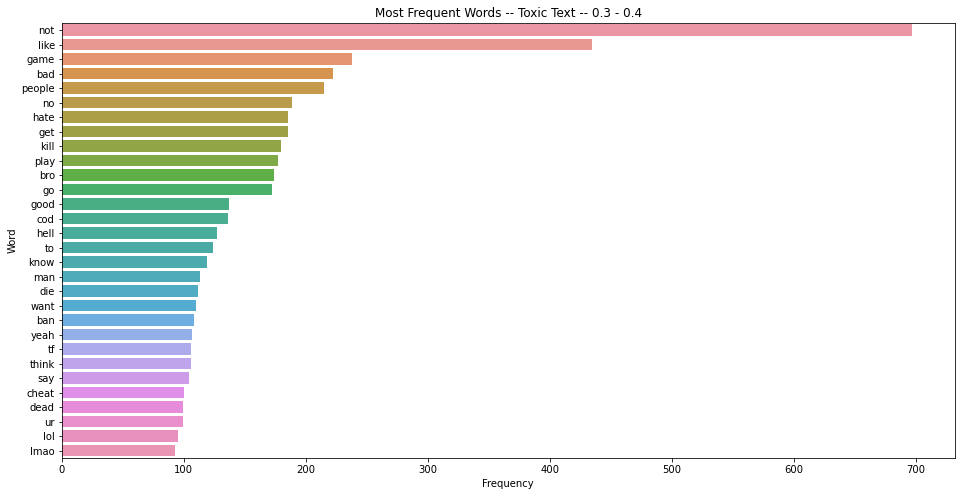

Word counts


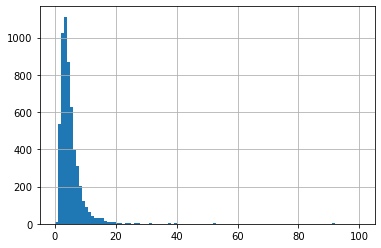

count    5585.000000
mean        4.579767
std         4.401149
min         0.000000
25%         2.000000
50%         4.000000
75%         6.000000
max       100.000000
dtype: float64


In [15]:
# From JF's data_cleaning.ipynb
# Plot bar graph for word frequency 
plt.figure(figsize=(16, 8))
sns.barplot(x='count',y='word',data=word_freq_tokenizer_Tox_3_4_df.iloc[:30])
plt.title('Most Frequent Words -- Toxic Text -- 0.3 - 0.4')
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.show()
# From JF's data_cleaning.ipynb
# Get word count of posts 
print("Word counts")
posts_len = [len(x.split()) for x in Tox_3_4_df['Text']]
pd.Series(posts_len).hist(bins=100)
plt.show()
print(pd.Series(posts_len).describe())

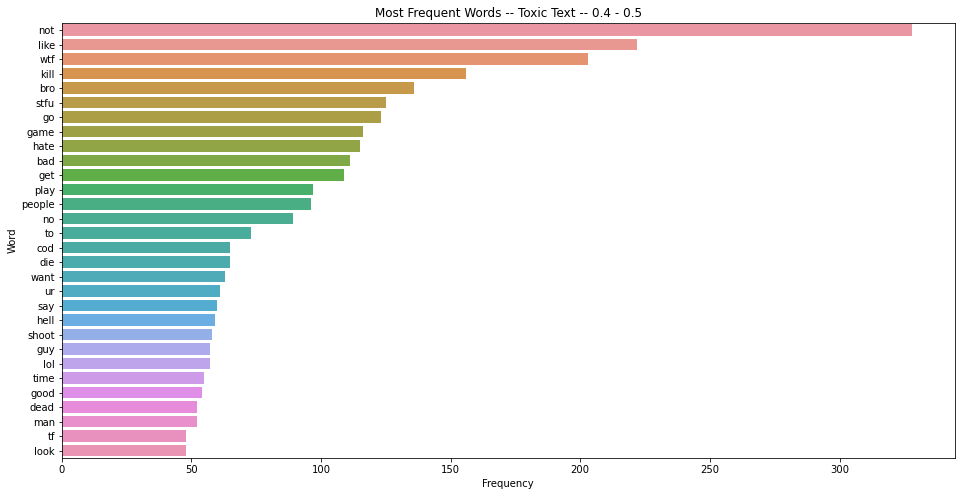

Word counts


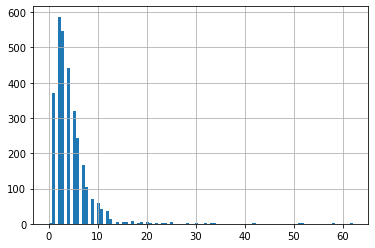

count    3057.000000
mean        4.455021
std         3.944065
min         0.000000
25%         2.000000
50%         4.000000
75%         6.000000
max        62.000000
dtype: float64


In [16]:
# From JF's data_cleaning.ipynb
# Plot bar graph for word frequency 
plt.figure(figsize=(16, 8))
sns.barplot(x='count',y='word',data=word_freq_tokenizer_Tox_4_5_df.iloc[:30])
plt.title('Most Frequent Words -- Toxic Text -- 0.4 - 0.5')
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.show()
# From JF's data_cleaning.ipynb
# Get word count of posts 
print("Word counts")
posts_len = [len(x.split()) for x in Tox_4_5_df['Text']]
pd.Series(posts_len).hist(bins=100)
plt.show()
print(pd.Series(posts_len).describe())

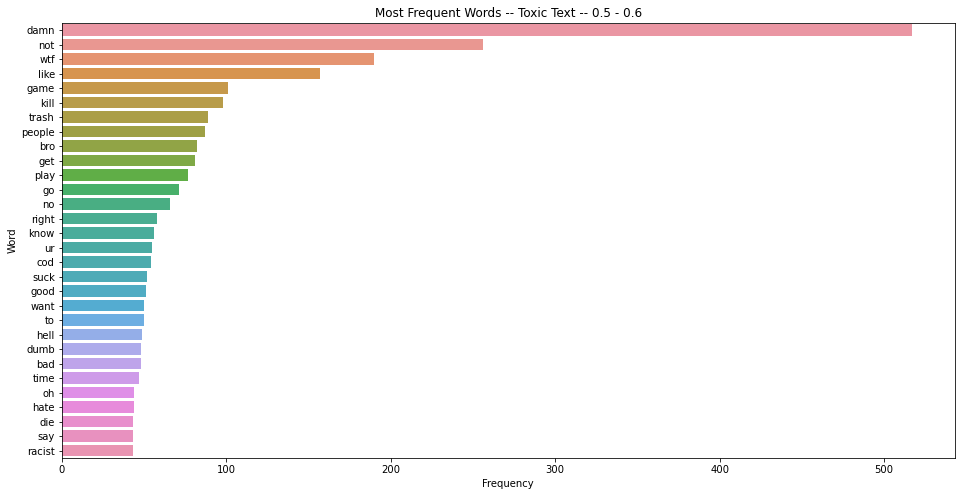

Word counts


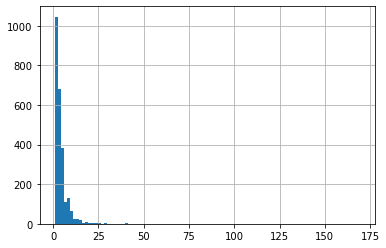

count    2519.000000
mean        4.108773
std         5.076155
min         1.000000
25%         2.000000
50%         3.000000
75%         5.000000
max       169.000000
dtype: float64


In [17]:
# From JF's data_cleaning.ipynb
# Plot bar graph for word frequency 
plt.figure(figsize=(16, 8))
sns.barplot(x='count',y='word',data=word_freq_tokenizer_Tox_5_6_df.iloc[:30])
plt.title('Most Frequent Words -- Toxic Text -- 0.5 - 0.6')
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.show()
# From JF's data_cleaning.ipynb
# Get word count of posts 
print("Word counts")
posts_len = [len(x.split()) for x in Tox_5_6_df['Text']]
pd.Series(posts_len).hist(bins=100)
plt.show()
print(pd.Series(posts_len).describe())

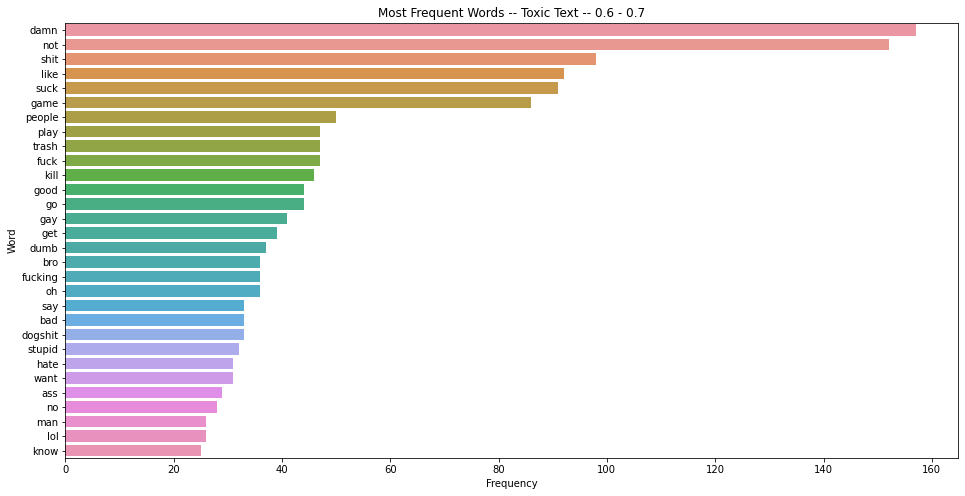

Word counts


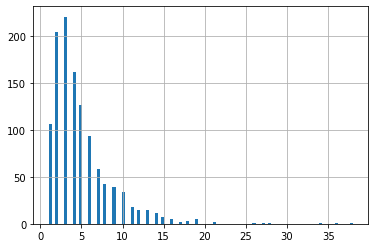

count    1179.000000
mean        4.914334
std         3.903804
min         1.000000
25%         2.000000
50%         4.000000
75%         6.000000
max        38.000000
dtype: float64


In [18]:
# From JF's data_cleaning.ipynb
# Plot bar graph for word frequency 
plt.figure(figsize=(16, 8))
sns.barplot(x='count',y='word',data=word_freq_tokenizer_Tox_6_7_df.iloc[:30])
plt.title('Most Frequent Words -- Toxic Text -- 0.6 - 0.7')
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.show()
# From JF's data_cleaning.ipynb
# Get word count of posts 
print("Word counts")
posts_len = [len(x.split()) for x in Tox_6_7_df['Text']]
pd.Series(posts_len).hist(bins=100)
plt.show()
print(pd.Series(posts_len).describe())

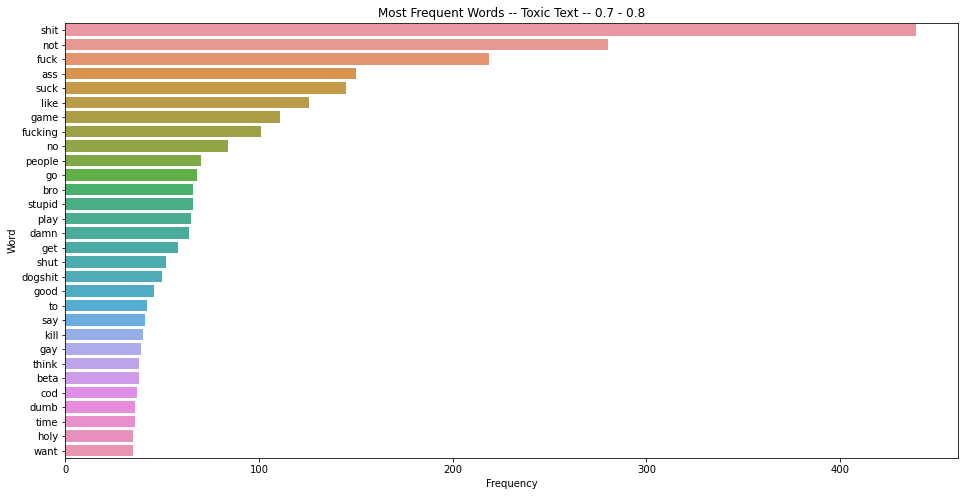

Word counts


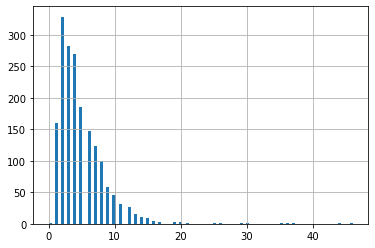

count    1823.000000
mean        4.957762
std         3.938311
min         0.000000
25%         2.000000
50%         4.000000
75%         6.000000
max        46.000000
dtype: float64


In [19]:
# From JF's data_cleaning.ipynb
# Plot bar graph for word frequency 
plt.figure(figsize=(16, 8))
sns.barplot(x='count',y='word',data=word_freq_tokenizer_Tox_7_8_df.iloc[:30])
plt.title('Most Frequent Words -- Toxic Text -- 0.7 - 0.8')
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.show()
# From JF's data_cleaning.ipynb
# Get word count of posts 
print("Word counts")
posts_len = [len(x.split()) for x in Tox_7_8_df['Text']]
pd.Series(posts_len).hist(bins=100)
plt.show()
print(pd.Series(posts_len).describe())

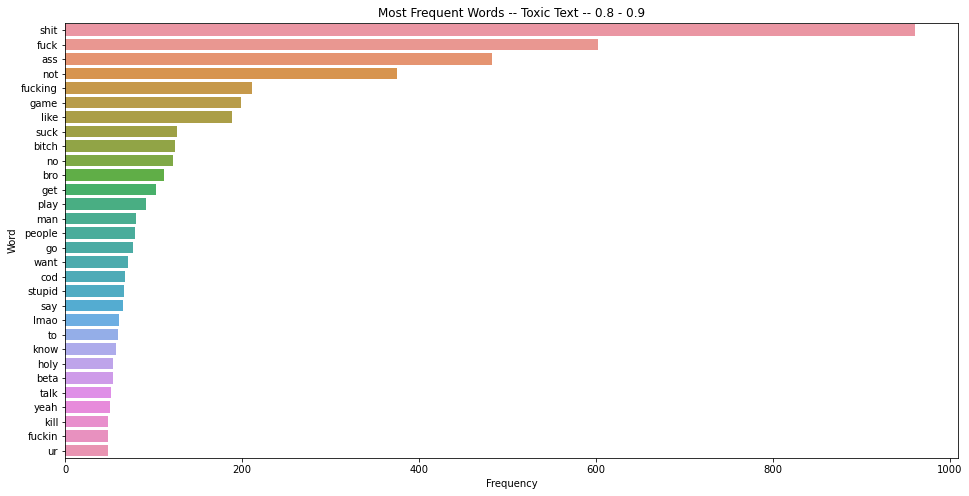

Word counts


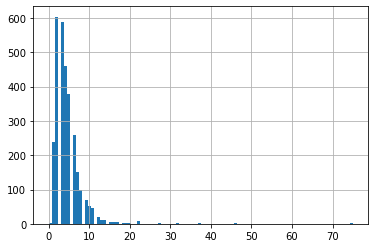

count    3020.000000
mean        4.394040
std         3.351699
min         0.000000
25%         2.000000
50%         4.000000
75%         5.000000
max        75.000000
dtype: float64


In [20]:
# From JF's data_cleaning.ipynb
# Plot bar graph for word frequency 
plt.figure(figsize=(16, 8))
sns.barplot(x='count',y='word',data=word_freq_tokenizer_Tox_8_9_df.iloc[:30])
plt.title('Most Frequent Words -- Toxic Text -- 0.8 - 0.9')
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.show()
# From JF's data_cleaning.ipynb
# Get word count of posts 
print("Word counts")
posts_len = [len(x.split()) for x in Tox_8_9_df['Text']]
pd.Series(posts_len).hist(bins=100)
plt.show()
print(pd.Series(posts_len).describe())

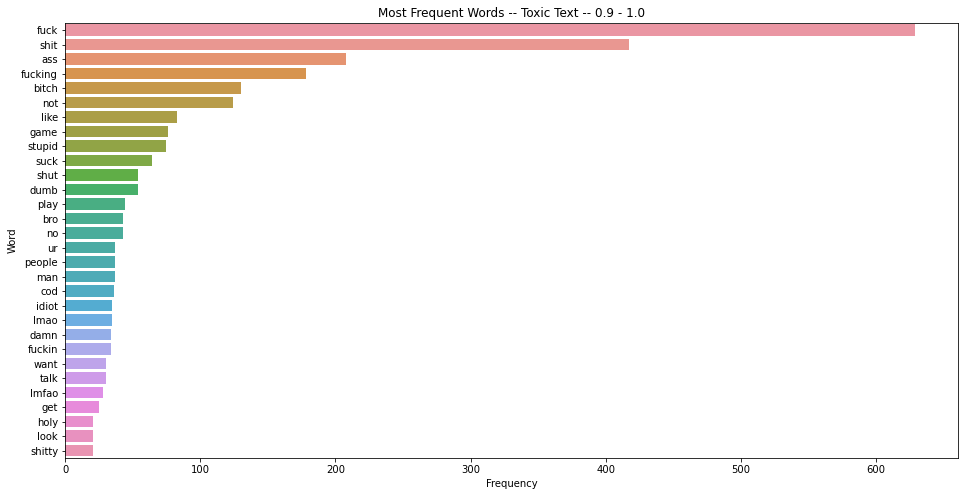

Word counts


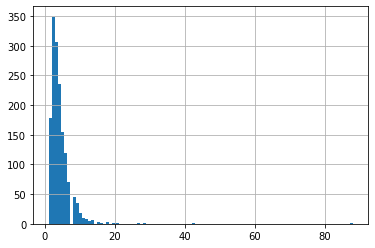

count    1554.000000
mean        4.091377
std         4.186956
min         1.000000
25%         2.000000
50%         3.000000
75%         5.000000
max        88.000000
dtype: float64


In [21]:
# From JF's data_cleaning.ipynb
# Plot bar graph for word frequency 
plt.figure(figsize=(16, 8))
sns.barplot(x='count',y='word',data=word_freq_tokenizer_Tox_9_10_df.iloc[:30])
plt.title('Most Frequent Words -- Toxic Text -- 0.9 - 1.0')
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.show()
# From JF's data_cleaning.ipynb
# Get word count of posts 
print("Word counts")
posts_len = [len(x.split()) for x in Tox_9_10_df['Text']]
pd.Series(posts_len).hist(bins=100)
plt.show()
print(pd.Series(posts_len).describe())

## Wordclouds

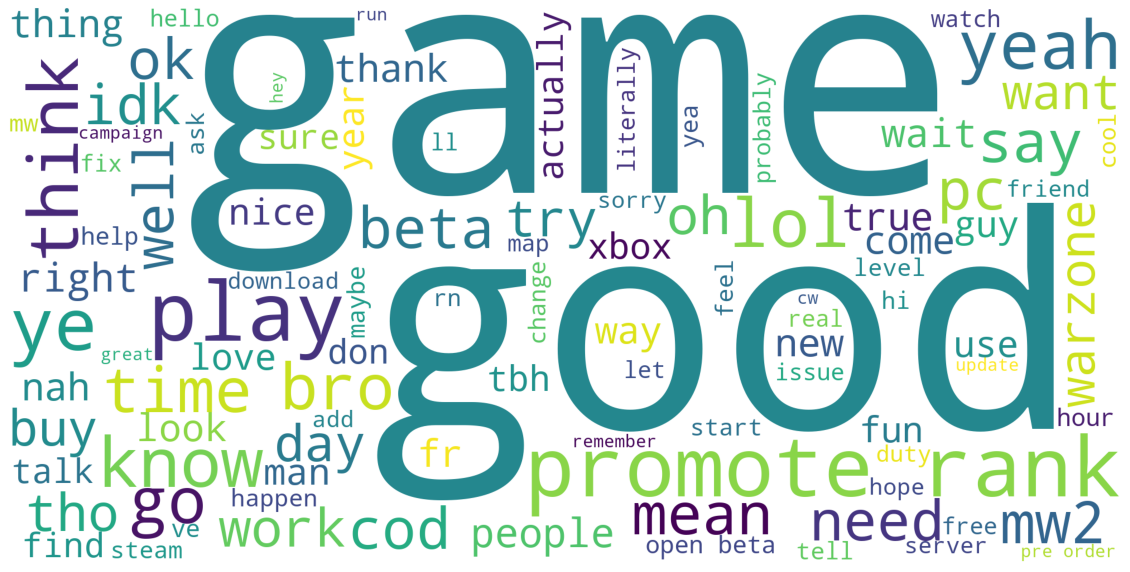

In [22]:
# From JF's data_cleaning.ipynb
# Plot word cloud
wc=WordCloud(max_words=100, background_color="white", width=2000, height=1000)
wc.generate(' '.join(word for word in Tox_0_1_df['Text']))
plt.figure(figsize=(20,15))
plt.axis('off')
plt.imshow(wc)
plt.show()

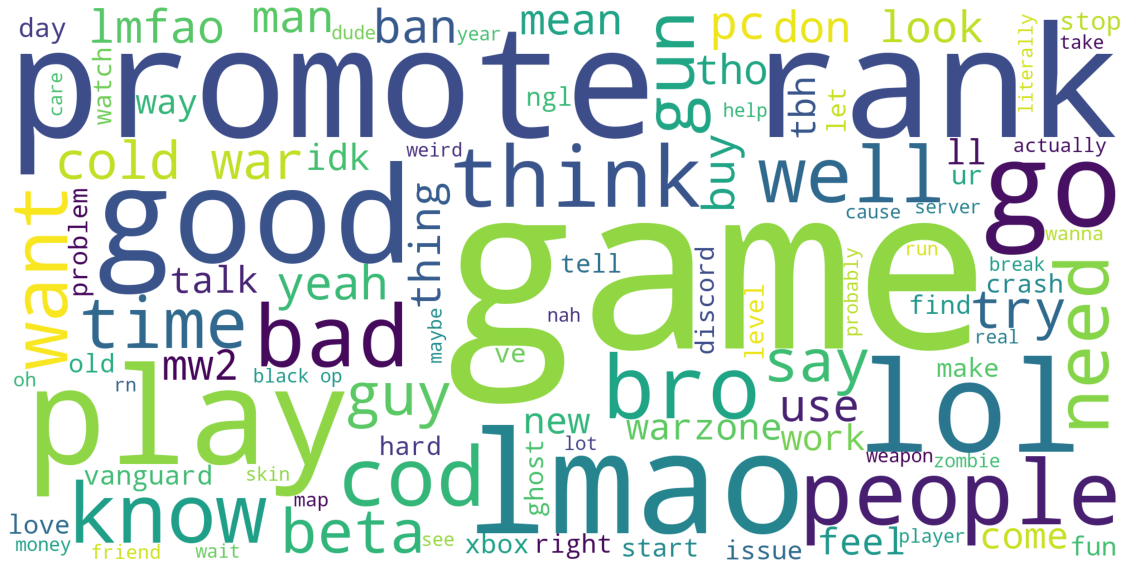

In [23]:
# From JF's data_cleaning.ipynb
# Plot word cloud
wc=WordCloud(max_words=100, background_color="white", width=2000, height=1000)
wc.generate(' '.join(word for word in Tox_1_2_df['Text']))
plt.figure(figsize=(20,15))
plt.axis('off')
plt.imshow(wc)
plt.show()

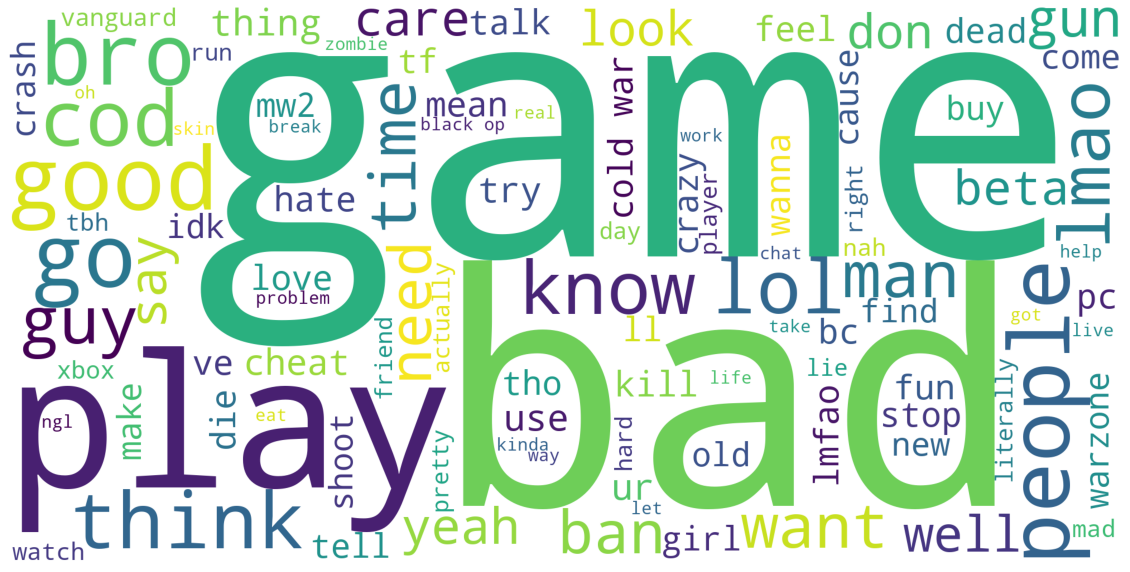

In [24]:
# From JF's data_cleaning.ipynb
# Plot word cloud
wc=WordCloud(max_words=100, background_color="white", width=2000, height=1000)
wc.generate(' '.join(word for word in Tox_2_3_df['Text']))
plt.figure(figsize=(20,15))
plt.axis('off')
plt.imshow(wc)
plt.show()

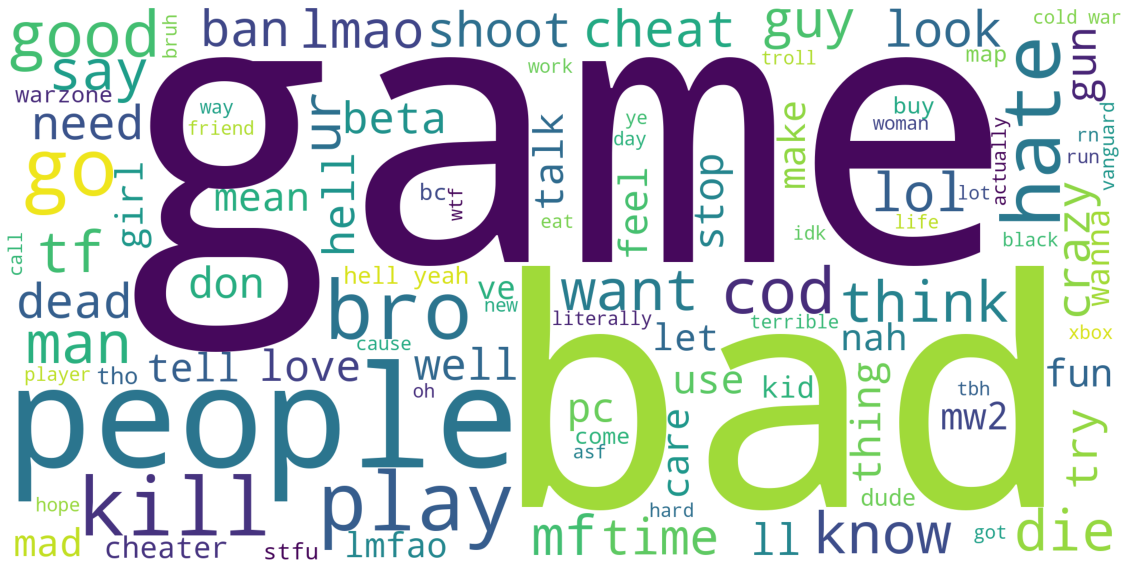

In [25]:
# From JF's data_cleaning.ipynb
# Plot word cloud
wc=WordCloud(max_words=100, background_color="white", width=2000, height=1000)
wc.generate(' '.join(word for word in Tox_3_4_df['Text']))
plt.figure(figsize=(20,15))
plt.axis('off')
plt.imshow(wc)
plt.show()

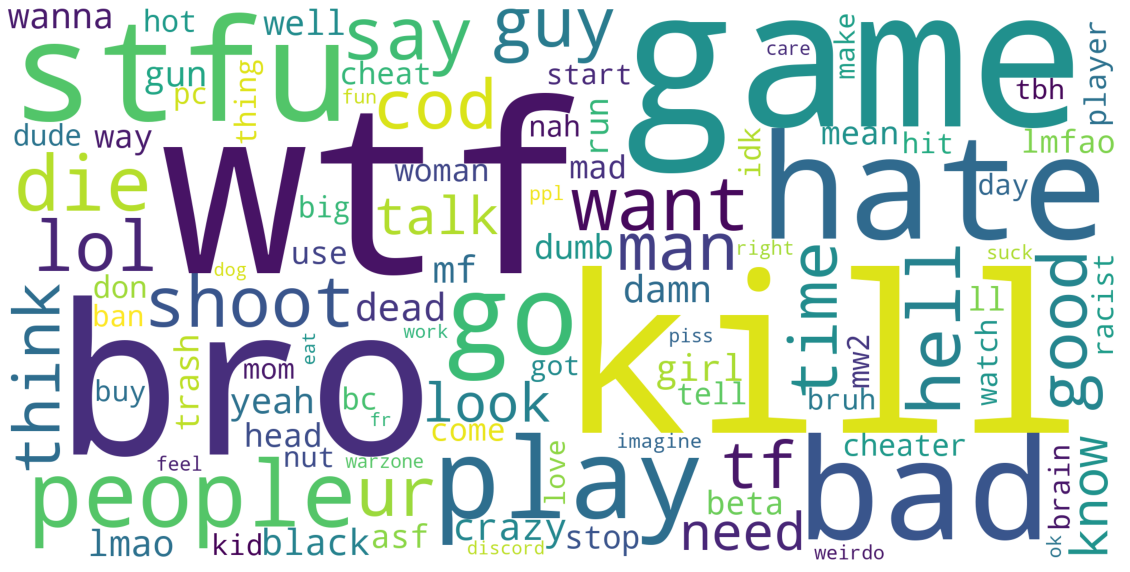

In [26]:
# From JF's data_cleaning.ipynb
# Plot word cloud
wc=WordCloud(max_words=100, background_color="white", width=2000, height=1000)
wc.generate(' '.join(word for word in Tox_4_5_df['Text']))
plt.figure(figsize=(20,15))
plt.axis('off')
plt.imshow(wc)
plt.show()

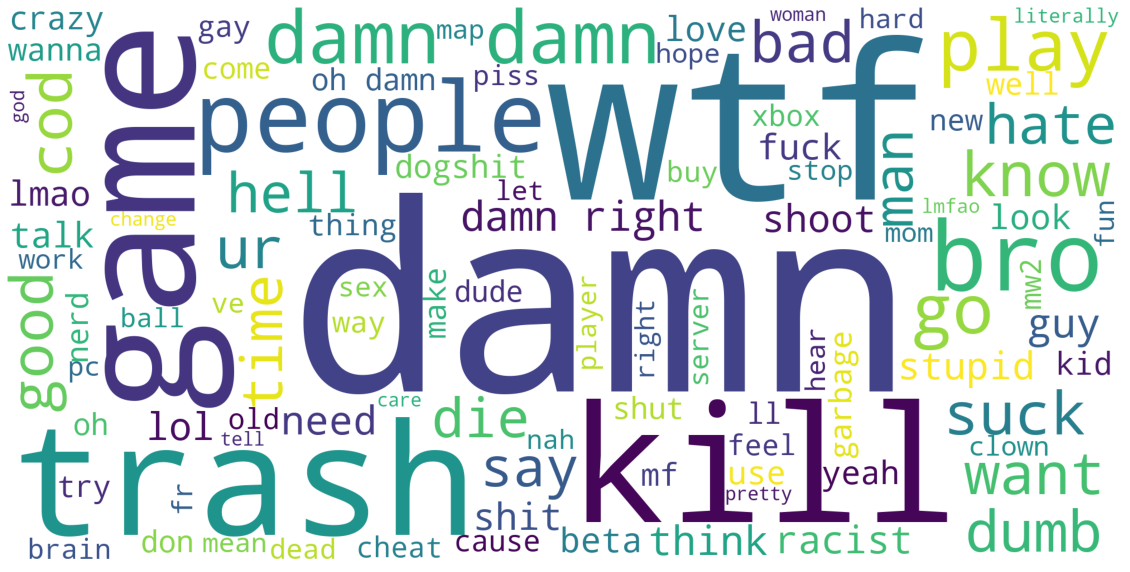

In [27]:
# From JF's data_cleaning.ipynb
# Plot word cloud
wc=WordCloud(max_words=100, background_color="white", width=2000, height=1000)
wc.generate(' '.join(word for word in Tox_5_6_df['Text']))
plt.figure(figsize=(20,15))
plt.axis('off')
plt.imshow(wc)
plt.show()

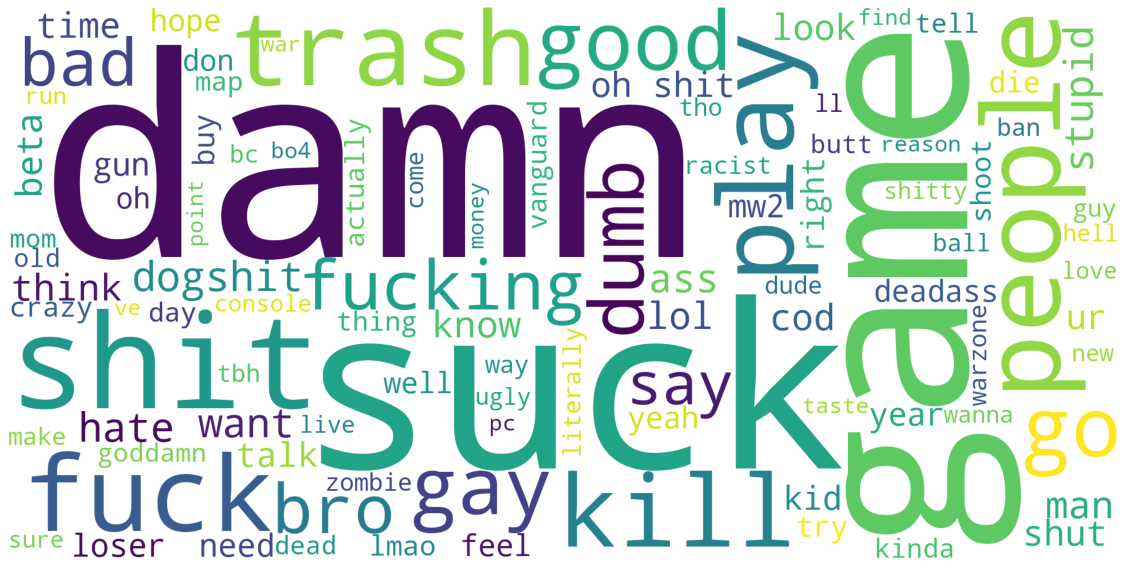

In [28]:
# From JF's data_cleaning.ipynb
# Plot word cloud
wc=WordCloud(max_words=100, background_color="white", width=2000, height=1000)
wc.generate(' '.join(word for word in Tox_6_7_df['Text']))
plt.figure(figsize=(20,15))
plt.axis('off')
plt.imshow(wc)
plt.show()

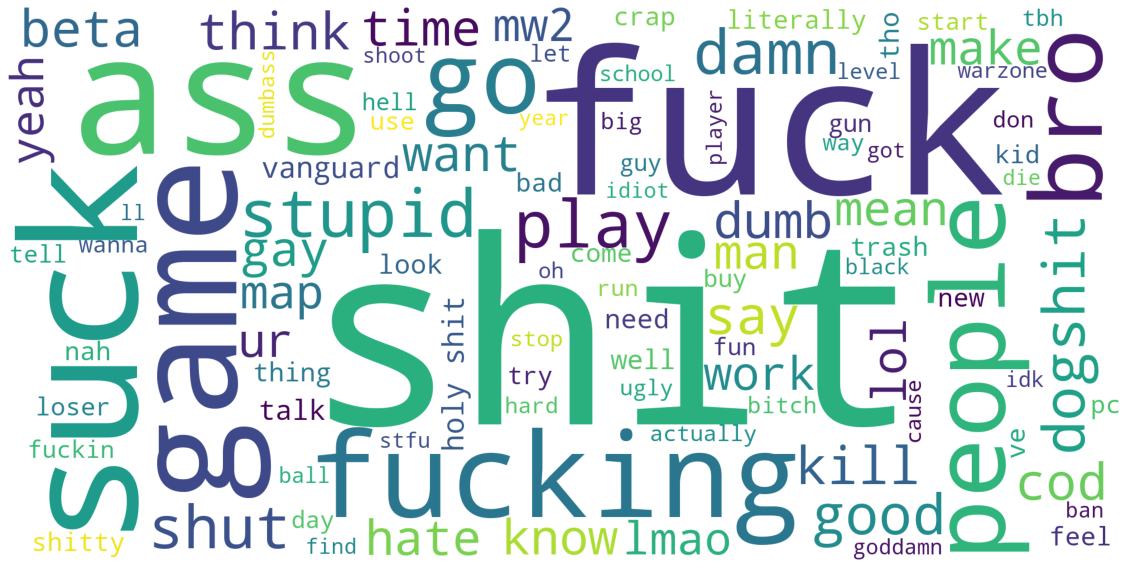

In [29]:
# From JF's data_cleaning.ipynb
# Plot word cloud
wc=WordCloud(max_words=100, background_color="white", width=2000, height=1000)
wc.generate(' '.join(word for word in Tox_7_8_df['Text']))
plt.figure(figsize=(20,15))
plt.axis('off')
plt.imshow(wc)
plt.show()

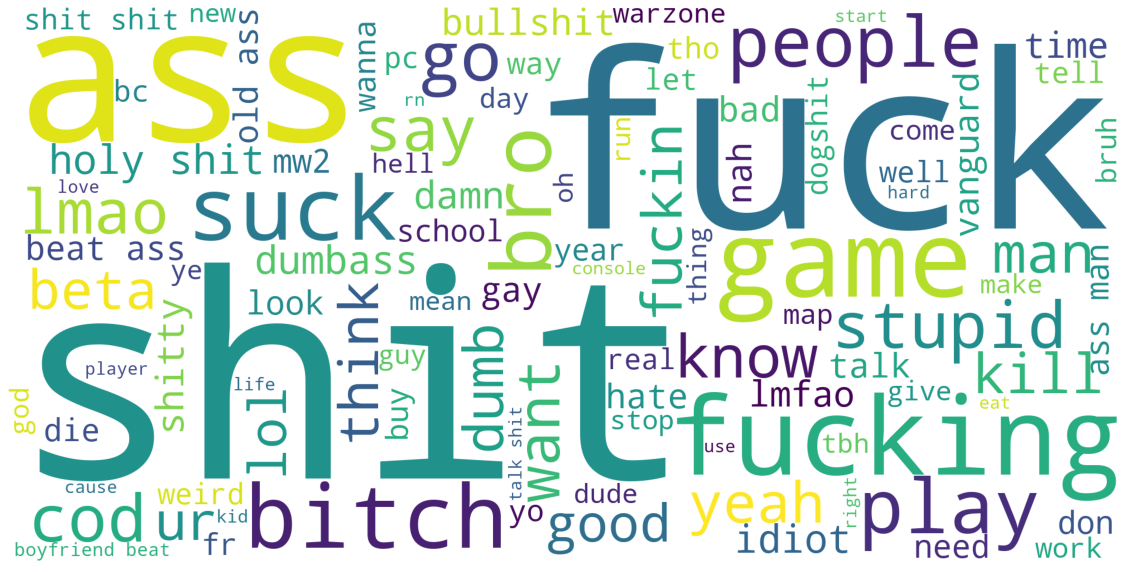

In [30]:
# From JF's data_cleaning.ipynb
# Plot word cloud
wc=WordCloud(max_words=100, background_color="white", width=2000, height=1000)
wc.generate(' '.join(word for word in Tox_8_9_df['Text']))
plt.figure(figsize=(20,15))
plt.axis('off')
plt.imshow(wc)
plt.show()

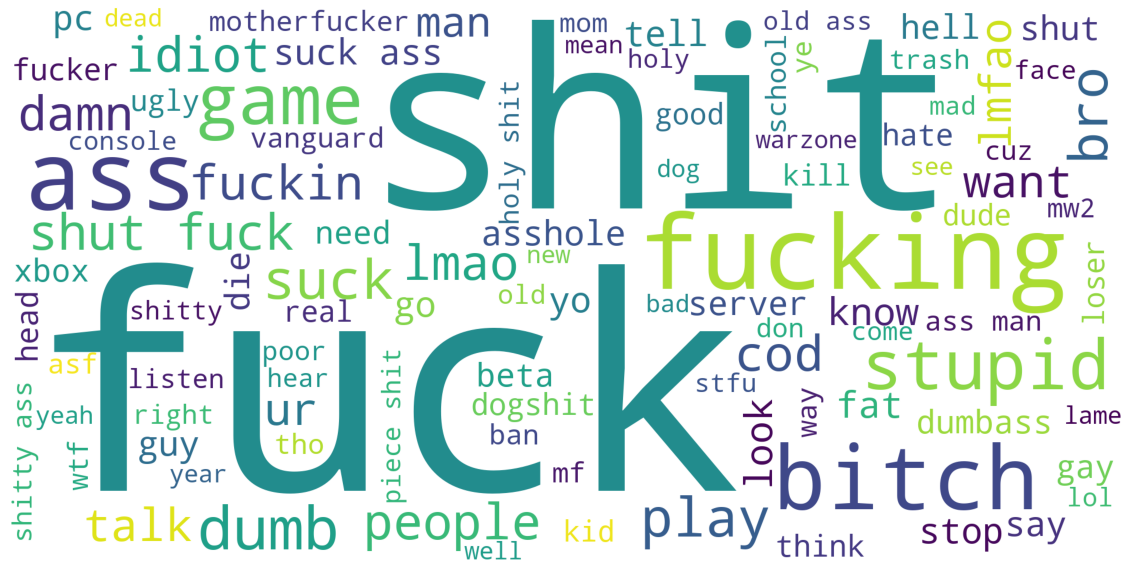

In [31]:
# From JF's data_cleaning.ipynb
# Plot word cloud
wc=WordCloud(max_words=100, background_color="white", width=2000, height=1000)
wc.generate(' '.join(word for word in Tox_9_10_df['Text']))
plt.figure(figsize=(20,15))
plt.axis('off')
plt.imshow(wc)
plt.show()

## Polarity and Subjectivity Scores

In [32]:
# Polarity score distribution for toxic chats
def get_polarity(text):
  return TextBlob(text).sentiment.polarity
def get_subjectivity(text):
  return TextBlob(text).sentiment.subjectivity

C:\Users\micha\AppData\Local\Temp\ipykernel_1008\347765150.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tox_0_1_df['Polarity'] = Tox_0_1_df['Text'].apply(get_polarity)


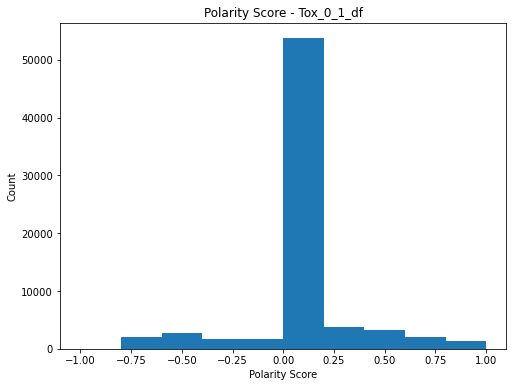

C:\Users\micha\AppData\Local\Temp\ipykernel_1008\347765150.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tox_0_1_df['Subjectivity'] = Tox_0_1_df['Text'].apply(get_subjectivity)


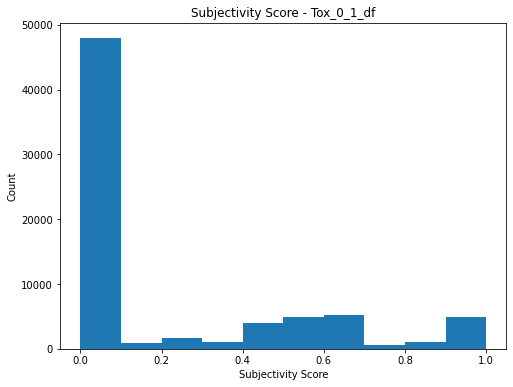

In [33]:
Tox_0_1_df['Polarity'] = Tox_0_1_df['Text'].apply(get_polarity)
ax = Tox_0_1_df['Polarity'].plot(kind='hist', title='Polarity Score - Tox_0_1_df', figsize=(8,6))
ax.set_xlabel("Polarity Score")
ax.set_ylabel("Count")
plt.show()
# Subjectivity score distribution for toxic chats
Tox_0_1_df['Subjectivity'] = Tox_0_1_df['Text'].apply(get_subjectivity)
ax = Tox_0_1_df['Subjectivity'].plot(kind='hist', title='Subjectivity Score - Tox_0_1_df', figsize=(8,6))
ax.set_xlabel("Subjectivity Score")
ax.set_ylabel("Count")
plt.show()

C:\Users\micha\AppData\Local\Temp\ipykernel_1008\2533403364.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tox_1_2_df['Polarity'] = Tox_1_2_df['Text'].apply(get_polarity)


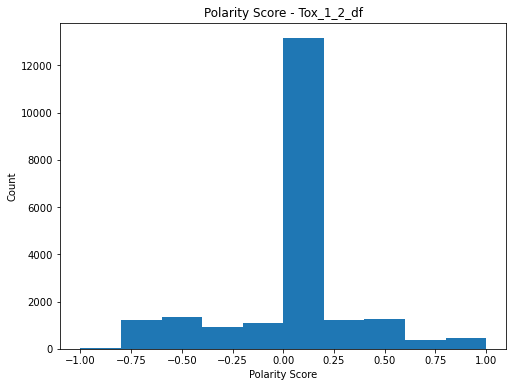

C:\Users\micha\AppData\Local\Temp\ipykernel_1008\2533403364.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tox_1_2_df['Subjectivity'] = Tox_1_2_df['Text'].apply(get_subjectivity)


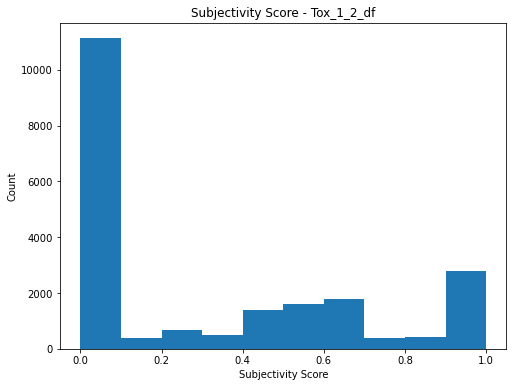

In [34]:
Tox_1_2_df['Polarity'] = Tox_1_2_df['Text'].apply(get_polarity)
ax = Tox_1_2_df['Polarity'].plot(kind='hist', title='Polarity Score - Tox_1_2_df', figsize=(8,6))
ax.set_xlabel("Polarity Score")
ax.set_ylabel("Count")
plt.show()
# Subjectivity score distribution for toxic chats
Tox_1_2_df['Subjectivity'] = Tox_1_2_df['Text'].apply(get_subjectivity)
ax = Tox_1_2_df['Subjectivity'].plot(kind='hist', title='Subjectivity Score - Tox_1_2_df', figsize=(8,6))
ax.set_xlabel("Subjectivity Score")
ax.set_ylabel("Count")
plt.show()

C:\Users\micha\AppData\Local\Temp\ipykernel_1008\3958380426.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tox_2_3_df['Polarity'] = Tox_2_3_df['Text'].apply(get_polarity)


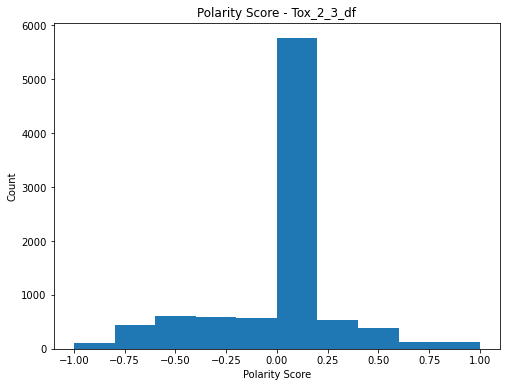

C:\Users\micha\AppData\Local\Temp\ipykernel_1008\3958380426.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tox_2_3_df['Subjectivity'] = Tox_2_3_df['Text'].apply(get_subjectivity)


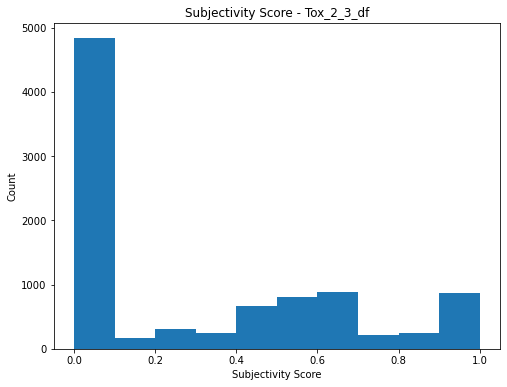

In [35]:
Tox_2_3_df['Polarity'] = Tox_2_3_df['Text'].apply(get_polarity)
ax = Tox_2_3_df['Polarity'].plot(kind='hist', title='Polarity Score - Tox_2_3_df', figsize=(8,6))
ax.set_xlabel("Polarity Score")
ax.set_ylabel("Count")
plt.show()
# Subjectivity score distribution for toxic chats
Tox_2_3_df['Subjectivity'] = Tox_2_3_df['Text'].apply(get_subjectivity)
ax = Tox_2_3_df['Subjectivity'].plot(kind='hist', title='Subjectivity Score - Tox_2_3_df', figsize=(8,6))
ax.set_xlabel("Subjectivity Score")
ax.set_ylabel("Count")
plt.show()

C:\Users\micha\AppData\Local\Temp\ipykernel_1008\3565077084.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tox_3_4_df['Polarity'] = Tox_3_4_df['Text'].apply(get_polarity)


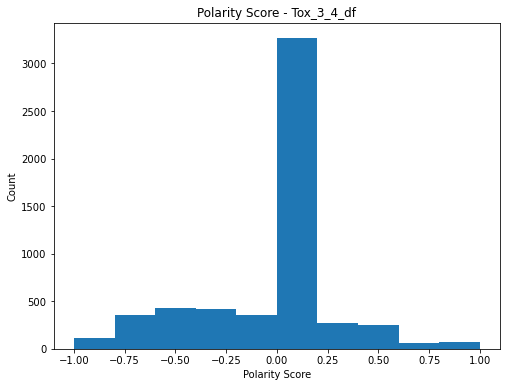

C:\Users\micha\AppData\Local\Temp\ipykernel_1008\3565077084.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tox_3_4_df['Subjectivity'] = Tox_3_4_df['Text'].apply(get_subjectivity)


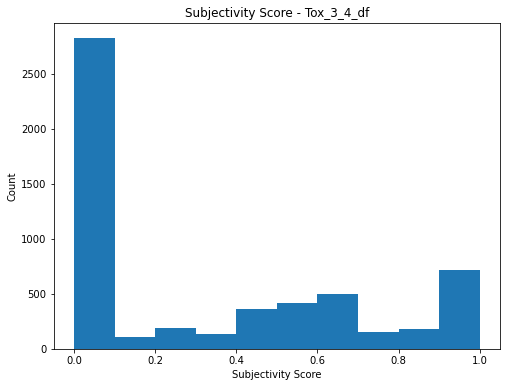

In [36]:
Tox_3_4_df['Polarity'] = Tox_3_4_df['Text'].apply(get_polarity)
ax = Tox_3_4_df['Polarity'].plot(kind='hist', title='Polarity Score - Tox_3_4_df', figsize=(8,6))
ax.set_xlabel("Polarity Score")
ax.set_ylabel("Count")
plt.show()
# Subjectivity score distribution for toxic chats
Tox_3_4_df['Subjectivity'] = Tox_3_4_df['Text'].apply(get_subjectivity)
ax = Tox_3_4_df['Subjectivity'].plot(kind='hist', title='Subjectivity Score - Tox_3_4_df', figsize=(8,6))
ax.set_xlabel("Subjectivity Score")
ax.set_ylabel("Count")
plt.show()

C:\Users\micha\AppData\Local\Temp\ipykernel_1008\2027037582.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tox_4_5_df['Polarity'] = Tox_4_5_df['Text'].apply(get_polarity)


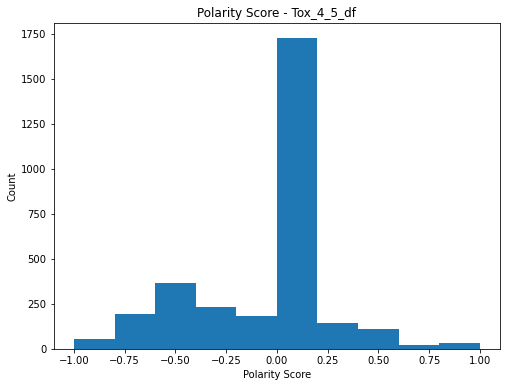

C:\Users\micha\AppData\Local\Temp\ipykernel_1008\2027037582.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tox_4_5_df['Subjectivity'] = Tox_4_5_df['Text'].apply(get_subjectivity)


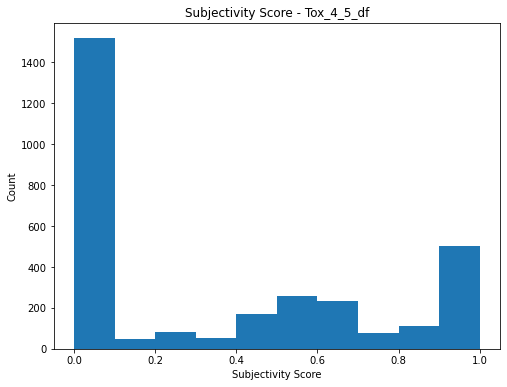

In [37]:
Tox_4_5_df['Polarity'] = Tox_4_5_df['Text'].apply(get_polarity)
ax = Tox_4_5_df['Polarity'].plot(kind='hist', title='Polarity Score - Tox_4_5_df', figsize=(8,6))
ax.set_xlabel("Polarity Score")
ax.set_ylabel("Count")
plt.show()
# Subjectivity score distribution for toxic chats
Tox_4_5_df['Subjectivity'] = Tox_4_5_df['Text'].apply(get_subjectivity)
ax = Tox_4_5_df['Subjectivity'].plot(kind='hist', title='Subjectivity Score - Tox_4_5_df', figsize=(8,6))
ax.set_xlabel("Subjectivity Score")
ax.set_ylabel("Count")
plt.show()

C:\Users\micha\AppData\Local\Temp\ipykernel_1008\2570625483.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tox_5_6_df['Polarity'] = Tox_5_6_df['Text'].apply(get_polarity)


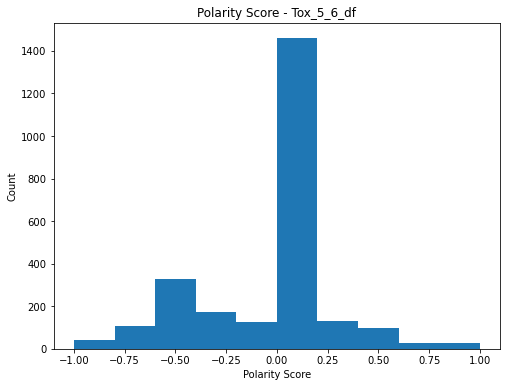

C:\Users\micha\AppData\Local\Temp\ipykernel_1008\2570625483.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tox_5_6_df['Subjectivity'] = Tox_5_6_df['Text'].apply(get_subjectivity)


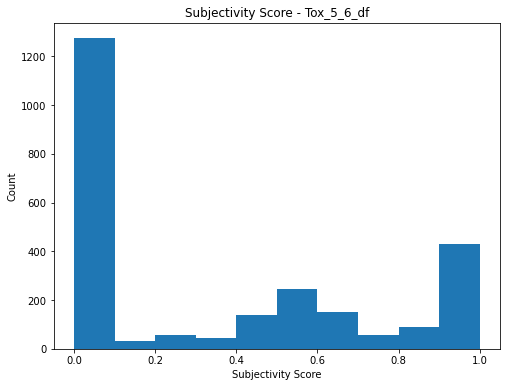

In [38]:
Tox_5_6_df['Polarity'] = Tox_5_6_df['Text'].apply(get_polarity)
ax = Tox_5_6_df['Polarity'].plot(kind='hist', title='Polarity Score - Tox_5_6_df', figsize=(8,6))
ax.set_xlabel("Polarity Score")
ax.set_ylabel("Count")
plt.show()
# Subjectivity score distribution for toxic chats
Tox_5_6_df['Subjectivity'] = Tox_5_6_df['Text'].apply(get_subjectivity)
ax = Tox_5_6_df['Subjectivity'].plot(kind='hist', title='Subjectivity Score - Tox_5_6_df', figsize=(8,6))
ax.set_xlabel("Subjectivity Score")
ax.set_ylabel("Count")
plt.show()

C:\Users\micha\AppData\Local\Temp\ipykernel_1008\1641774200.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tox_6_7_df['Polarity'] = Tox_6_7_df['Text'].apply(get_polarity)


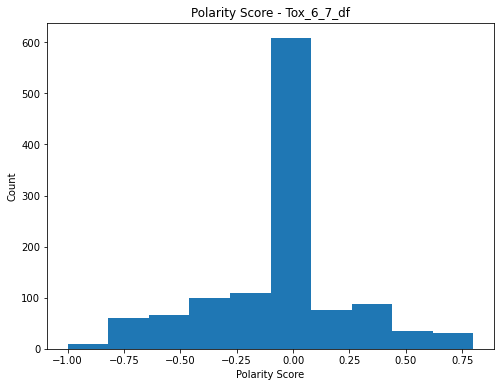

C:\Users\micha\AppData\Local\Temp\ipykernel_1008\1641774200.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tox_6_7_df['Subjectivity'] = Tox_6_7_df['Text'].apply(get_subjectivity)


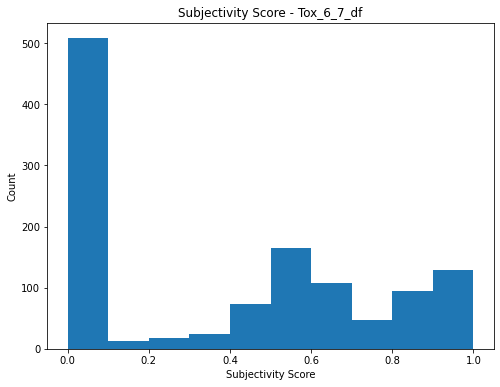

In [39]:
Tox_6_7_df['Polarity'] = Tox_6_7_df['Text'].apply(get_polarity)
ax = Tox_6_7_df['Polarity'].plot(kind='hist', title='Polarity Score - Tox_6_7_df', figsize=(8,6))
ax.set_xlabel("Polarity Score")
ax.set_ylabel("Count")
plt.show()
# Subjectivity score distribution for toxic chats
Tox_6_7_df['Subjectivity'] = Tox_6_7_df['Text'].apply(get_subjectivity)
ax = Tox_6_7_df['Subjectivity'].plot(kind='hist', title='Subjectivity Score - Tox_6_7_df', figsize=(8,6))
ax.set_xlabel("Subjectivity Score")
ax.set_ylabel("Count")
plt.show()

C:\Users\micha\AppData\Local\Temp\ipykernel_1008\2836110747.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tox_7_8_df['Polarity'] = Tox_7_8_df['Text'].apply(get_polarity)


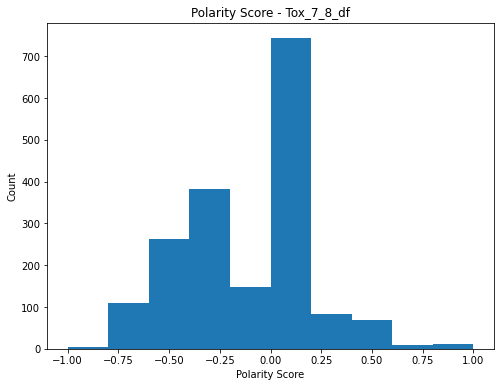

C:\Users\micha\AppData\Local\Temp\ipykernel_1008\2836110747.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tox_7_8_df['Subjectivity'] = Tox_7_8_df['Text'].apply(get_subjectivity)


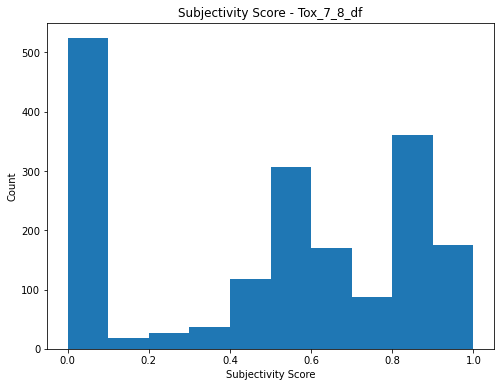

In [40]:
Tox_7_8_df['Polarity'] = Tox_7_8_df['Text'].apply(get_polarity)
ax = Tox_7_8_df['Polarity'].plot(kind='hist', title='Polarity Score - Tox_7_8_df', figsize=(8,6))
ax.set_xlabel("Polarity Score")
ax.set_ylabel("Count")
plt.show()
# Subjectivity score distribution for toxic chats
Tox_7_8_df['Subjectivity'] = Tox_7_8_df['Text'].apply(get_subjectivity)
ax = Tox_7_8_df['Subjectivity'].plot(kind='hist', title='Subjectivity Score - Tox_7_8_df', figsize=(8,6))
ax.set_xlabel("Subjectivity Score")
ax.set_ylabel("Count")
plt.show()

C:\Users\micha\AppData\Local\Temp\ipykernel_1008\3453314204.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tox_8_9_df['Polarity'] = Tox_8_9_df['Text'].apply(get_polarity)


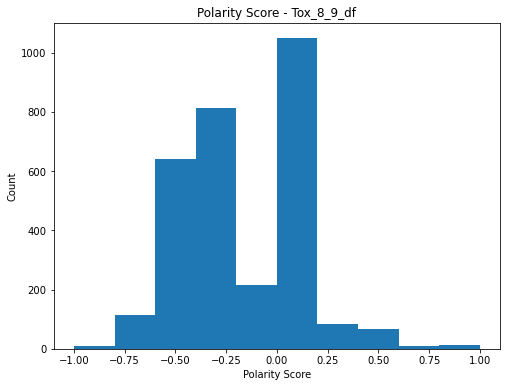

C:\Users\micha\AppData\Local\Temp\ipykernel_1008\3453314204.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tox_8_9_df['Subjectivity'] = Tox_8_9_df['Text'].apply(get_subjectivity)


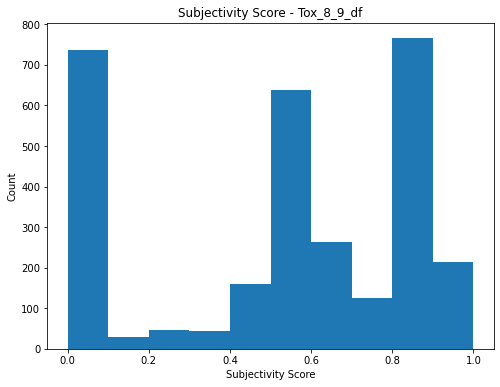

In [41]:
Tox_8_9_df['Polarity'] = Tox_8_9_df['Text'].apply(get_polarity)
ax = Tox_8_9_df['Polarity'].plot(kind='hist', title='Polarity Score - Tox_8_9_df', figsize=(8,6))
ax.set_xlabel("Polarity Score")
ax.set_ylabel("Count")
plt.show()
# Subjectivity score distribution for toxic chats
Tox_8_9_df['Subjectivity'] = Tox_8_9_df['Text'].apply(get_subjectivity)
ax = Tox_8_9_df['Subjectivity'].plot(kind='hist', title='Subjectivity Score - Tox_8_9_df', figsize=(8,6))
ax.set_xlabel("Subjectivity Score")
ax.set_ylabel("Count")
plt.show()

C:\Users\micha\AppData\Local\Temp\ipykernel_1008\1753852692.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tox_9_10_df['Polarity'] = Tox_9_10_df['Text'].apply(get_polarity)


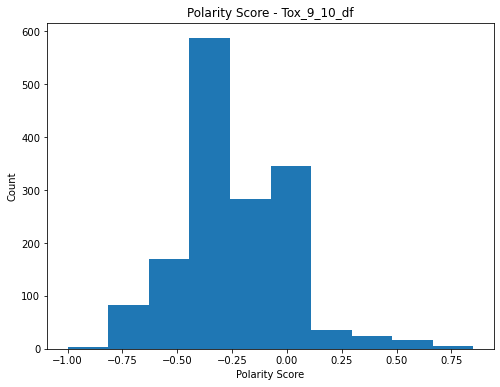

C:\Users\micha\AppData\Local\Temp\ipykernel_1008\1753852692.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tox_9_10_df['Subjectivity'] = Tox_9_10_df['Text'].apply(get_subjectivity)


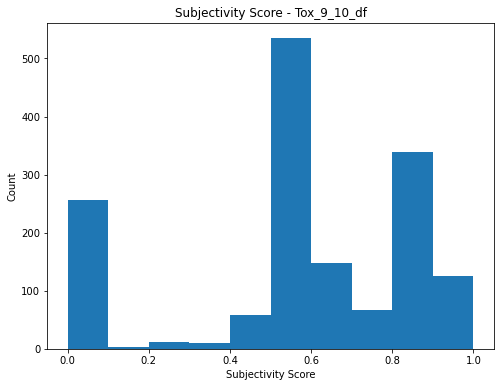

In [42]:
Tox_9_10_df['Polarity'] = Tox_9_10_df['Text'].apply(get_polarity)
ax = Tox_9_10_df['Polarity'].plot(kind='hist', title='Polarity Score - Tox_9_10_df', figsize=(8,6))
ax.set_xlabel("Polarity Score")
ax.set_ylabel("Count")
plt.show()
# Subjectivity score distribution for toxic chats
Tox_9_10_df['Subjectivity'] = Tox_9_10_df['Text'].apply(get_subjectivity)
ax = Tox_9_10_df['Subjectivity'].plot(kind='hist', title='Subjectivity Score - Tox_9_10_df', figsize=(8,6))
ax.set_xlabel("Subjectivity Score")
ax.set_ylabel("Count")
plt.show()

In [97]:
Tox_0_1_df['bucket'] = 0
Tox_1_2_df['bucket'] = 1
Tox_2_3_df['bucket'] = 2
Tox_3_4_df['bucket'] = 3
Tox_4_5_df['bucket'] = 4
Tox_5_6_df['bucket'] = 5
Tox_6_7_df['bucket'] = 6
Tox_7_8_df['bucket'] = 7
Tox_8_9_df['bucket'] = 8
Tox_9_10_df['bucket'] = 9
# Keeping Tox_0_1_df out because it skews the chart
bucketed_df = pd.concat([Tox_1_2_df,Tox_2_3_df,Tox_3_4_df,Tox_4_5_df,Tox_5_6_df,Tox_6_7_df,Tox_7_8_df,Tox_8_9_df,Tox_9_10_df])
bucketed_df.head()

C:\Users\micha\AppData\Local\Temp\ipykernel_1008\3296584369.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tox_0_1_df['bucket'] = 0
C:\Users\micha\AppData\Local\Temp\ipykernel_1008\3296584369.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tox_1_2_df['bucket'] = 1
C:\Users\micha\AppData\Local\Temp\ipykernel_1008\3296584369.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

Time  User_Id                                Text Attachment  \
2   1661962696556      113                        ana de armas        NaN   
8   1661962720812      113  black aventador ana de armas decal        NaN   
16  1661962745070      113            not think care car linda        NaN   
18  1661962746070     1135             wanna help good loadout        NaN   
33  1661962797854       35                      want dream car        NaN   

            Reply_chain Reactions  gif  Edited_Time  TOXICITY_Probability  \
2   1014569529956909139       NaN  NaN          NaN              0.108281   
8                   NaN       NaN  NaN          NaN              0.157432   
16  1014569976868388914       NaN  NaN          NaN              0.126957   
18                  NaN       NaN  NaN          NaN              0.123737   
33                  NaN       NaN  NaN          NaN              0.105705   

    Polarity  Subjectivity  bucket  
2   0.000000      0.000000       1  
8  -0.166667      0.433333       1  
16  0.000000      0.000000       1  
18  0.700000      0.600000       1  
33  0.000000      0.000000       1

bucket
1    AxesSubplot(0.125,0.125;0.352273x0.755)
2    AxesSubplot(0.125,0.125;0.352273x0.755)
3    AxesSubplot(0.125,0.125;0.352273x0.755)
4    AxesSubplot(0.125,0.125;0.352273x0.755)
5    AxesSubplot(0.125,0.125;0.352273x0.755)
6    AxesSubplot(0.125,0.125;0.352273x0.755)
7    AxesSubplot(0.125,0.125;0.352273x0.755)
8    AxesSubplot(0.125,0.125;0.352273x0.755)
9    AxesSubplot(0.125,0.125;0.352273x0.755)
Name: Polarity, dtype: object

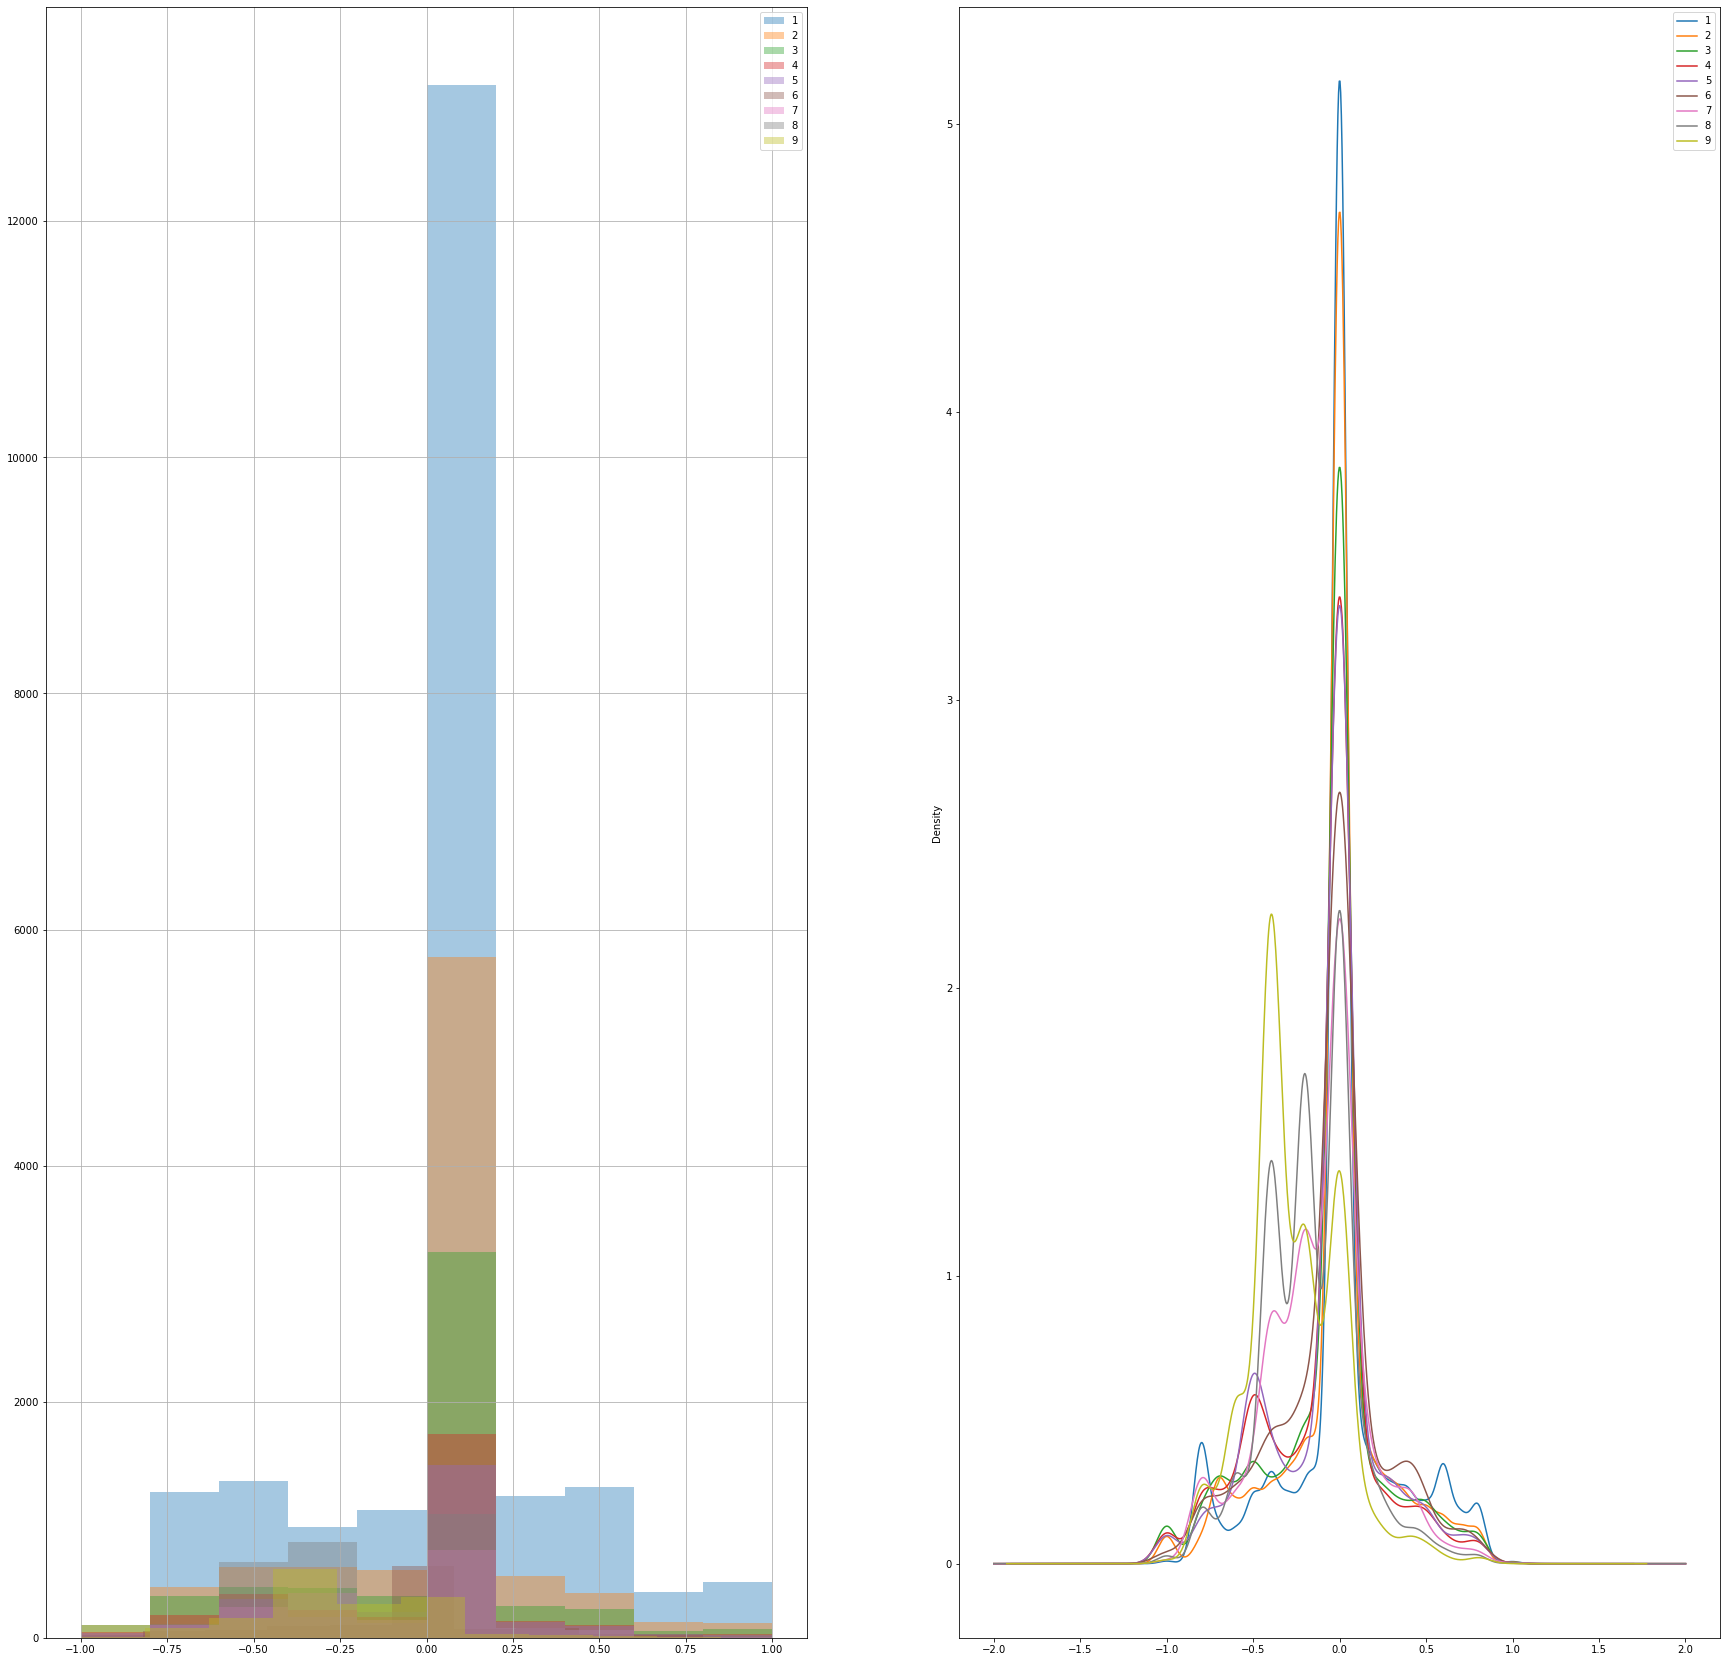

In [98]:
# Polarity for all toxic buckets
fig, axs = plt.subplots(ncols=2)
bucketed_df.groupby("bucket").Polarity.plot(kind='kde', ax=axs[1], figsize=(30,30), legend=True)
bucketed_df.groupby("bucket").Polarity.hist(alpha=0.4, ax=axs[0], figsize=(30,30), legend=True)

bucket
1    AxesSubplot(0.125,0.125;0.352273x0.755)
2    AxesSubplot(0.125,0.125;0.352273x0.755)
3    AxesSubplot(0.125,0.125;0.352273x0.755)
4    AxesSubplot(0.125,0.125;0.352273x0.755)
5    AxesSubplot(0.125,0.125;0.352273x0.755)
6    AxesSubplot(0.125,0.125;0.352273x0.755)
7    AxesSubplot(0.125,0.125;0.352273x0.755)
8    AxesSubplot(0.125,0.125;0.352273x0.755)
9    AxesSubplot(0.125,0.125;0.352273x0.755)
Name: Subjectivity, dtype: object

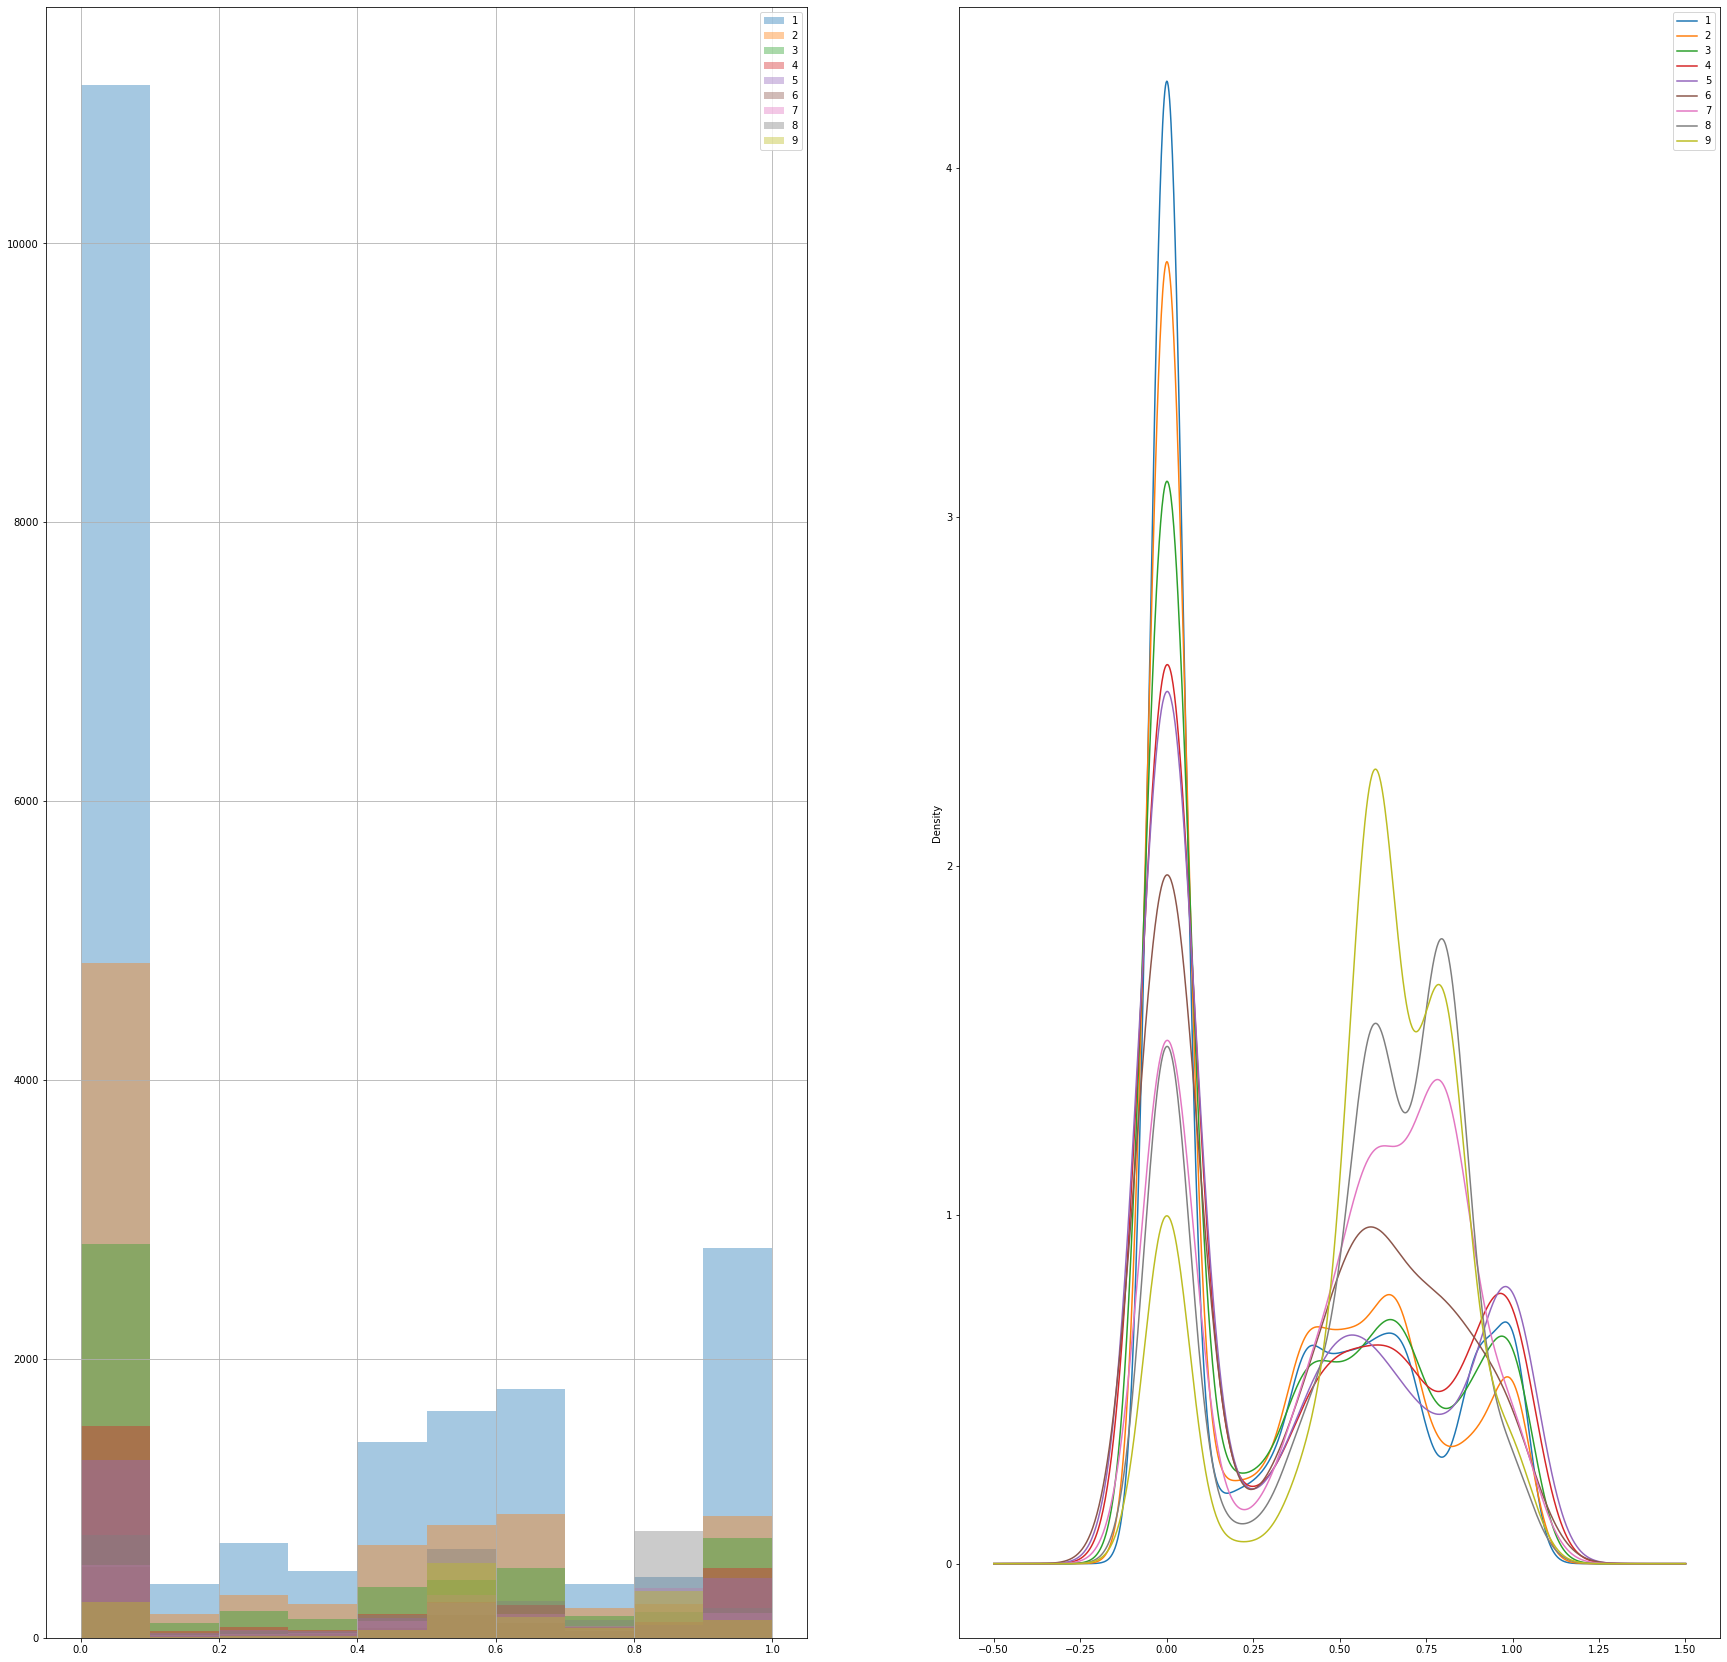

In [110]:
# Subjectivity for all toxic buckets
fig, axs = plt.subplots(ncols=2)
bucketed_df.groupby("bucket").Subjectivity.plot(kind='kde', ax=axs[1], figsize=(30,30), legend=True)
bucketed_df.groupby("bucket").Subjectivity.hist(alpha=0.4, ax=axs[0], figsize=(30,30), legend=True)

<AxesSubplot:>

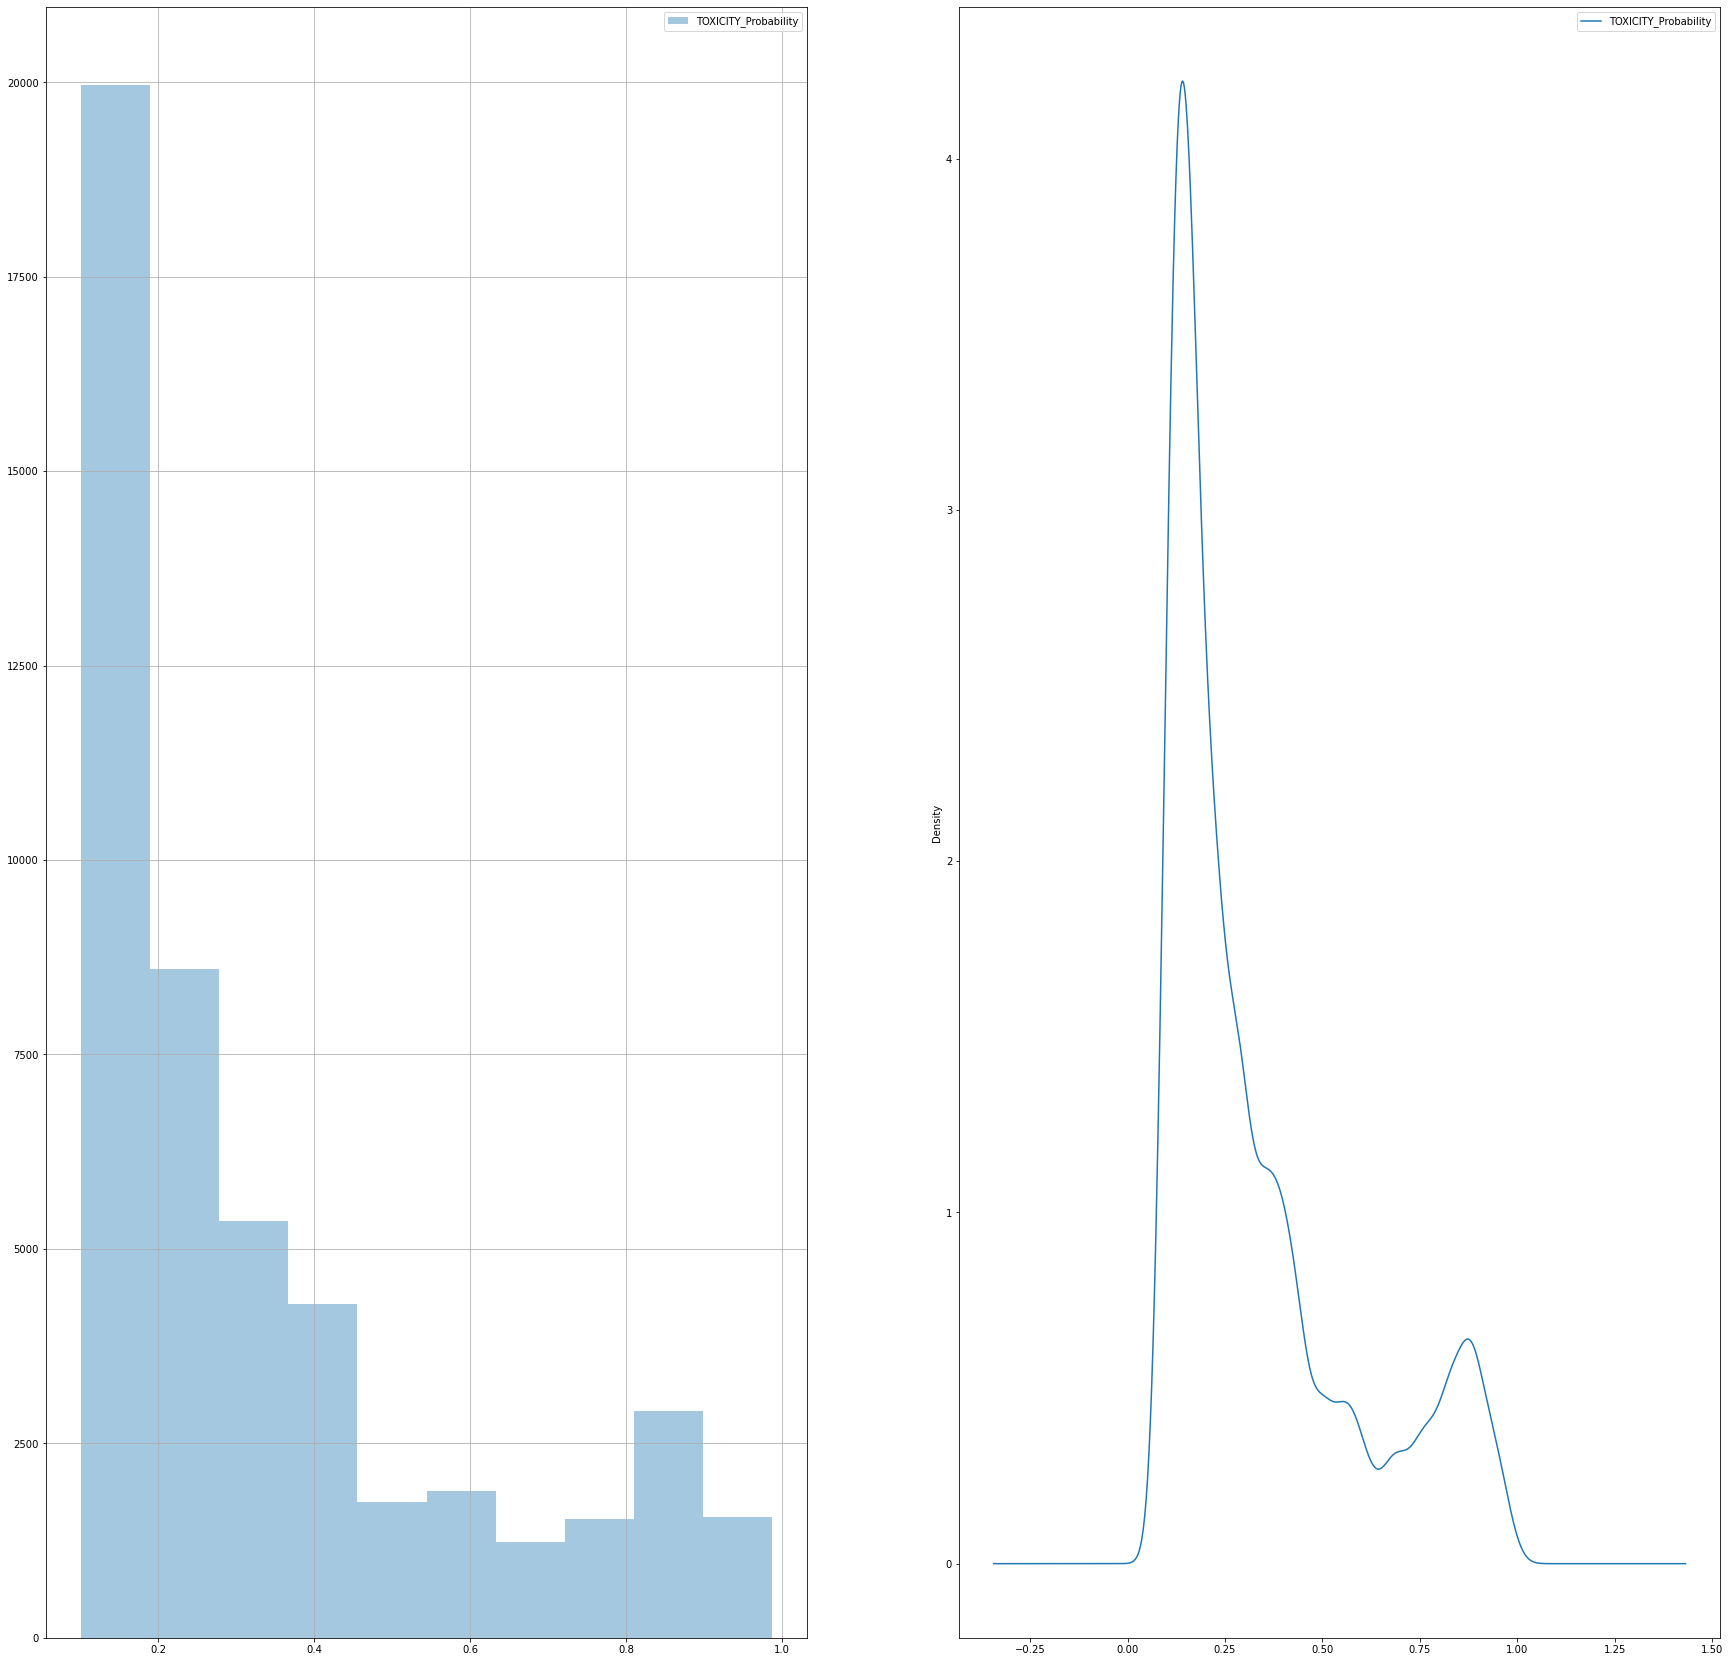

In [100]:
# But what about general toxic distributions across all data?

fig, axs = plt.subplots(ncols=2)
bucketed_df.TOXICITY_Probability.plot(kind='kde', ax=axs[1], figsize=(30,30), legend=True)
bucketed_df.TOXICITY_Probability.hist(alpha=0.4, ax=axs[0], figsize=(30,30), legend=True)

*Was removing stop-words a bad idea before doing sentiment analyis?*

### Moving on to looking atn the other cols


In [96]:
def collumn_ratios(collumn):
    print(f"Total number of { collumn } comments: ",df[f'{ collumn }'].count()," / ",len(df), " = ", float(df[f'{ collumn }'].count()/len(df)))
    print(f"Tox_0_1_df number of { collumn } comments: ",Tox_0_1_df[f'{ collumn }'].count()," / ",len(Tox_0_1_df), " = ", float(Tox_0_1_df[f'{ collumn }'].count()/len(Tox_0_1_df)))
    print(f"Tox_1_2_df number of { collumn } comments: ",Tox_1_2_df[f'{ collumn }'].count()," / ",len(Tox_1_2_df), " = ", float(Tox_1_2_df[f'{ collumn }'].count()/len(Tox_1_2_df)))
    print(f"Tox_2_3_df number of { collumn } comments: ",Tox_2_3_df[f'{ collumn }'].count()," / ",len(Tox_2_3_df), " = ", float(Tox_2_3_df[f'{ collumn }'].count()/len(Tox_2_3_df)))
    print(f"Tox_3_4_df number of { collumn } comments: ",Tox_3_4_df[f'{ collumn }'].count()," / ",len(Tox_3_4_df), " = ", float(Tox_3_4_df[f'{ collumn }'].count()/len(Tox_3_4_df)))
    print(f"Tox_4_5_df number of { collumn } comments: ",Tox_4_5_df[f'{ collumn }'].count()," / ",len(Tox_4_5_df), " = ", float(Tox_4_5_df[f'{ collumn }'].count()/len(Tox_4_5_df)))
    print(f"Tox_5_6_df number of { collumn } comments: ",Tox_5_6_df[f'{ collumn }'].count()," / ",len(Tox_5_6_df), " = ", float(Tox_5_6_df[f'{ collumn }'].count()/len(Tox_5_6_df)))
    print(f"Tox_6_7_df number of { collumn } comments: ",Tox_6_7_df[f'{ collumn }'].count()," / ",len(Tox_6_7_df), " = ", float(Tox_6_7_df[f'{ collumn }'].count()/len(Tox_6_7_df)))
    print(f"Tox_7_8_df number of { collumn } comments: ",Tox_7_8_df[f'{ collumn }'].count()," / ",len(Tox_7_8_df), " = ", float(Tox_7_8_df[f'{ collumn }'].count()/len(Tox_7_8_df)))
    print(f"Tox_8_9_df number of { collumn } comments: ",Tox_8_9_df[f'{ collumn }'].count()," / ",len(Tox_8_9_df), " = ", float(Tox_8_9_df[f'{ collumn }'].count()/len(Tox_8_9_df)))
    print(f"Tox_9_10_df number of { collumn } comments: ",Tox_9_10_df[f'{ collumn }'].count()," / ",len(Tox_9_10_df), " = ", float(Tox_9_10_df[f'{ collumn }'].count()/len(Tox_9_10_df)))

In [68]:
# Too Sparse!
collumn_ratios("Attachment")

Total number of Attachment comments:  63  /  121473  =  0.0005186337704675113
Tox_0_1_df number of Attachment comments:  43  /  72373  =  0.0005941442250563055
Tox_1_2_df number of Attachment comments:  5  /  21114  =  0.00023680969972530075
Tox_2_3_df number of Attachment comments:  8  /  9249  =  0.0008649583738782571
Tox_3_4_df number of Attachment comments:  3  /  5585  =  0.0005371530886302597
Tox_4_5_df number of Attachment comments:  1  /  3057  =  0.00032711808963035657
Tox_5_6_df number of Attachment comments:  0  /  2519  =  0.0
Tox_6_7_df number of Attachment comments:  0  /  1179  =  0.0
Tox_7_8_df number of Attachment comments:  1  /  1823  =  0.0005485463521667581
Tox_8_9_df number of Attachment comments:  1  /  3020  =  0.00033112582781456954
Tox_9_10_df number of Attachment comments:  1  /  1554  =  0.0006435006435006435


In [69]:
# No obvious trends, other than ticking down a little near the end
collumn_ratios("Reply_chain")

Total number of Reply_chain comments:  43655  /  121473  =  0.3593802738057017
Tox_0_1_df number of Reply_chain comments:  26136  /  72373  =  0.36112915037375815
Tox_1_2_df number of Reply_chain comments:  7244  /  21114  =  0.3430898929620157
Tox_2_3_df number of Reply_chain comments:  3428  /  9249  =  0.3706346632068332
Tox_3_4_df number of Reply_chain comments:  2102  /  5585  =  0.3763652641002686
Tox_4_5_df number of Reply_chain comments:  1174  /  3057  =  0.3840366372260386
Tox_5_6_df number of Reply_chain comments:  937  /  2519  =  0.3719730051607781
Tox_6_7_df number of Reply_chain comments:  436  /  1179  =  0.36980491942324
Tox_7_8_df number of Reply_chain comments:  634  /  1823  =  0.3477783872737246
Tox_8_9_df number of Reply_chain comments:  1015  /  3020  =  0.3360927152317881
Tox_9_10_df number of Reply_chain comments:  549  /  1554  =  0.3532818532818533


In [70]:
# Maybe Useful?  Trends down towards overly polite comments.  Perhaps as they are less engaging.
collumn_ratios("Reactions")

Total number of Reactions comments:  3316  /  121473  =  0.027298247347147104
Tox_0_1_df number of Reactions comments:  1619  /  72373  =  0.022370220938747874
Tox_1_2_df number of Reactions comments:  618  /  21114  =  0.029269678886047173
Tox_2_3_df number of Reactions comments:  313  /  9249  =  0.03384149637798681
Tox_3_4_df number of Reactions comments:  237  /  5585  =  0.04243509400179051
Tox_4_5_df number of Reactions comments:  118  /  3057  =  0.038599934576382076
Tox_5_6_df number of Reactions comments:  127  /  2519  =  0.050416832076220726
Tox_6_7_df number of Reactions comments:  48  /  1179  =  0.04071246819338423
Tox_7_8_df number of Reactions comments:  55  /  1823  =  0.030170049369171694
Tox_8_9_df number of Reactions comments:  113  /  3020  =  0.03741721854304636
Tox_9_10_df number of Reactions comments:  68  /  1554  =  0.043758043758043756


In [71]:
# Too Sparse!
collumn_ratios("gif")

Total number of gif comments:  159  /  121473  =  0.0013089328492751477
Tox_0_1_df number of gif comments:  68  /  72373  =  0.0009395769140425297
Tox_1_2_df number of gif comments:  51  /  21114  =  0.0024154589371980675
Tox_2_3_df number of gif comments:  20  /  9249  =  0.0021623959346956426
Tox_3_4_df number of gif comments:  14  /  5585  =  0.002506714413607878
Tox_4_5_df number of gif comments:  4  /  3057  =  0.0013084723585214263
Tox_5_6_df number of gif comments:  1  /  2519  =  0.0003969829297340214
Tox_6_7_df number of gif comments:  1  /  1179  =  0.0008481764206955047
Tox_7_8_df number of gif comments:  0  /  1823  =  0.0
Tox_8_9_df number of gif comments:  0  /  3020  =  0.0
Tox_9_10_df number of gif comments:  0  /  1554  =  0.0


In [72]:
# ERR?
collumn_ratios("Edited_Time")

Total number of Edited_Time comments:  0  /  121473  =  0.0
Tox_0_1_df number of Edited_Time comments:  0  /  72373  =  0.0
Tox_1_2_df number of Edited_Time comments:  0  /  21114  =  0.0
Tox_2_3_df number of Edited_Time comments:  0  /  9249  =  0.0
Tox_3_4_df number of Edited_Time comments:  0  /  5585  =  0.0
Tox_4_5_df number of Edited_Time comments:  0  /  3057  =  0.0
Tox_5_6_df number of Edited_Time comments:  0  /  2519  =  0.0
Tox_6_7_df number of Edited_Time comments:  0  /  1179  =  0.0
Tox_7_8_df number of Edited_Time comments:  0  /  1823  =  0.0
Tox_8_9_df number of Edited_Time comments:  0  /  3020  =  0.0
Tox_9_10_df number of Edited_Time comments:  0  /  1554  =  0.0


-- Does not seem worth it to extrapolate on these other columns further.

https://neptune.ai/blog/exploratory-data-analysis-natural-language-processing-tools

Maybe vader analysis next?